In [ ]:
%pip install xgboost

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
from catboost import CatBoostClassifier

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Model ve Tahmin

In [6]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose=False)

In [7]:
y_pred = catb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

## Model Tuning

In [8]:
catb = CatBoostClassifier()

In [9]:
catb_params = {"iterations": [200,300,100],
               "learning_rate": [0.01,0.03,0.1],
               "depth": [4,5,8]}

In [10]:
catb_cv_model = GridSearchCV(catb, catb_params,cv=10, n_jobs=-1,verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
0:	learn: 0.6873479	total: 53ms	remaining: 10.6s
1:	learn: 0.6831412	total: 53.8ms	remaining: 5.32s
2:	learn: 0.6775438	total: 54.7ms	remaining: 3.59s
3:	learn: 0.6734284	total: 55.5ms	remaining: 2.72s
4:	learn: 0.6689162	total: 56.3ms	remaining: 2.19s
5:	learn: 0.6659669	total: 57ms	remaining: 1.84s
6:	learn: 0.6611419	total: 57.7ms	remaining: 1.59s
7:	learn: 0.6562778	total: 58.5ms	remaining: 1.4s
8:	learn: 0.6517264	total: 59.3ms	remaining: 1.26s
9:	learn: 0.6476316	total: 60.2ms	remaining: 1.14s
10:	learn: 0.6435554	total: 61ms	remaining: 1.05s
11:	learn: 0.6393757	total: 62.5ms	remaining: 980ms
12:	learn: 0.6360379	total: 63.4ms	remaining: 912ms
13:	learn: 0.6320022	total: 64.4ms	remaining: 856ms
14:	learn: 0.6294588	total: 65.3ms	remaining: 805ms
15:	learn: 0.6260481	total: 66.1ms	remaining: 761ms
16:	learn: 0.6233461	total: 67.2ms	remaining: 723ms
17:	learn: 0.6203868	total: 68.2ms	remaining: 689ms
18:	learn: 0.61666

0:	learn: 0.6876697	total: 47.6ms	remaining: 9.48s
1:	learn: 0.6829617	total: 48.6ms	remaining: 4.81s
2:	learn: 0.6778738	total: 49.5ms	remaining: 3.25s
3:	learn: 0.6730977	total: 50.3ms	remaining: 2.46s
4:	learn: 0.6682905	total: 51.1ms	remaining: 1.99s
5:	learn: 0.6649868	total: 52ms	remaining: 1.68s
6:	learn: 0.6614782	total: 52.8ms	remaining: 1.46s
7:	learn: 0.6564165	total: 53.5ms	remaining: 1.28s
8:	learn: 0.6520228	total: 54.2ms	remaining: 1.15s
9:	learn: 0.6473774	total: 54.9ms	remaining: 1.04s
10:	learn: 0.6429395	total: 55.6ms	remaining: 956ms
11:	learn: 0.6385479	total: 56.4ms	remaining: 883ms
12:	learn: 0.6344456	total: 57.1ms	remaining: 821ms
13:	learn: 0.6307766	total: 57.8ms	remaining: 767ms
14:	learn: 0.6276587	total: 58.4ms	remaining: 721ms
15:	learn: 0.6228828	total: 59.1ms	remaining: 680ms
16:	learn: 0.6202330	total: 59.8ms	remaining: 644ms
17:	learn: 0.6169204	total: 60.6ms	remaining: 613ms
18:	learn: 0.6137121	total: 61.3ms	remaining: 584ms
19:	learn: 0.6102442	tot

136:	learn: 0.4276484	total: 510ms	remaining: 234ms
137:	learn: 0.4270680	total: 511ms	remaining: 230ms
138:	learn: 0.4264889	total: 512ms	remaining: 225ms
139:	learn: 0.4256703	total: 513ms	remaining: 220ms
140:	learn: 0.4251422	total: 514ms	remaining: 215ms
141:	learn: 0.4245552	total: 515ms	remaining: 210ms
142:	learn: 0.4239093	total: 516ms	remaining: 206ms
143:	learn: 0.4233733	total: 565ms	remaining: 220ms
144:	learn: 0.4225811	total: 566ms	remaining: 215ms
145:	learn: 0.4219797	total: 567ms	remaining: 210ms
146:	learn: 0.4214480	total: 568ms	remaining: 205ms
147:	learn: 0.4209972	total: 569ms	remaining: 200ms
148:	learn: 0.4202241	total: 571ms	remaining: 196ms
149:	learn: 0.4197448	total: 572ms	remaining: 191ms
150:	learn: 0.4191195	total: 573ms	remaining: 186ms
151:	learn: 0.4187727	total: 574ms	remaining: 181ms
152:	learn: 0.4180465	total: 575ms	remaining: 177ms
153:	learn: 0.4177281	total: 576ms	remaining: 172ms
154:	learn: 0.4173220	total: 613ms	remaining: 178ms
155:	learn: 

159:	learn: 0.4258048	total: 538ms	remaining: 134ms
160:	learn: 0.4253108	total: 539ms	remaining: 131ms
161:	learn: 0.4248141	total: 540ms	remaining: 127ms
162:	learn: 0.4243989	total: 541ms	remaining: 123ms
163:	learn: 0.4240515	total: 542ms	remaining: 119ms
164:	learn: 0.4236331	total: 542ms	remaining: 115ms
165:	learn: 0.4231273	total: 543ms	remaining: 111ms
166:	learn: 0.4225204	total: 544ms	remaining: 108ms
167:	learn: 0.4221192	total: 545ms	remaining: 104ms
168:	learn: 0.4214544	total: 546ms	remaining: 100ms
169:	learn: 0.4208779	total: 547ms	remaining: 96.5ms
170:	learn: 0.4204706	total: 548ms	remaining: 92.9ms
171:	learn: 0.4200183	total: 548ms	remaining: 89.3ms
172:	learn: 0.4196766	total: 549ms	remaining: 85.7ms
173:	learn: 0.4193789	total: 550ms	remaining: 82.3ms
174:	learn: 0.4190921	total: 551ms	remaining: 78.8ms
175:	learn: 0.4188086	total: 552ms	remaining: 75.3ms
176:	learn: 0.4183933	total: 553ms	remaining: 71.9ms
177:	learn: 0.4180408	total: 554ms	remaining: 68.5ms
178

159:	learn: 0.4228434	total: 474ms	remaining: 119ms
160:	learn: 0.4224765	total: 477ms	remaining: 115ms
161:	learn: 0.4220701	total: 481ms	remaining: 113ms
162:	learn: 0.4215454	total: 482ms	remaining: 109ms
163:	learn: 0.4211479	total: 483ms	remaining: 106ms
164:	learn: 0.4208470	total: 483ms	remaining: 103ms
165:	learn: 0.4202115	total: 484ms	remaining: 99.2ms
166:	learn: 0.4198369	total: 486ms	remaining: 96ms
167:	learn: 0.4192431	total: 486ms	remaining: 92.7ms
168:	learn: 0.4187443	total: 487ms	remaining: 89.4ms
169:	learn: 0.4183425	total: 488ms	remaining: 86.1ms
170:	learn: 0.4177276	total: 489ms	remaining: 82.9ms
171:	learn: 0.4173803	total: 492ms	remaining: 80.2ms
172:	learn: 0.4168992	total: 493ms	remaining: 77ms
173:	learn: 0.4165429	total: 494ms	remaining: 73.8ms
174:	learn: 0.4162660	total: 495ms	remaining: 70.7ms
175:	learn: 0.4160156	total: 496ms	remaining: 67.6ms
176:	learn: 0.4155884	total: 496ms	remaining: 64.5ms
177:	learn: 0.4151868	total: 497ms	remaining: 61.5ms
178

159:	learn: 0.4296153	total: 580ms	remaining: 145ms
160:	learn: 0.4290311	total: 581ms	remaining: 141ms
161:	learn: 0.4285640	total: 582ms	remaining: 137ms
162:	learn: 0.4280834	total: 583ms	remaining: 132ms
163:	learn: 0.4278333	total: 584ms	remaining: 128ms
164:	learn: 0.4273026	total: 590ms	remaining: 125ms
165:	learn: 0.4268526	total: 591ms	remaining: 121ms
166:	learn: 0.4265446	total: 613ms	remaining: 121ms
167:	learn: 0.4262444	total: 621ms	remaining: 118ms
168:	learn: 0.4257371	total: 622ms	remaining: 114ms
169:	learn: 0.4250854	total: 633ms	remaining: 112ms
170:	learn: 0.4246603	total: 635ms	remaining: 108ms
171:	learn: 0.4241636	total: 635ms	remaining: 103ms
172:	learn: 0.4238050	total: 637ms	remaining: 99.3ms
173:	learn: 0.4231370	total: 638ms	remaining: 95.3ms
174:	learn: 0.4226341	total: 639ms	remaining: 91.2ms
175:	learn: 0.4222843	total: 640ms	remaining: 87.3ms
176:	learn: 0.4220731	total: 641ms	remaining: 83.3ms
177:	learn: 0.4217977	total: 677ms	remaining: 83.7ms
178:	l

115:	learn: 0.3663739	total: 151ms	remaining: 110ms
116:	learn: 0.3655270	total: 152ms	remaining: 108ms
117:	learn: 0.3644131	total: 154ms	remaining: 107ms
118:	learn: 0.3642033	total: 154ms	remaining: 105ms
119:	learn: 0.3633428	total: 155ms	remaining: 103ms
120:	learn: 0.3627642	total: 156ms	remaining: 102ms
121:	learn: 0.3618673	total: 173ms	remaining: 111ms
122:	learn: 0.3614015	total: 178ms	remaining: 112ms
123:	learn: 0.3607393	total: 184ms	remaining: 112ms
124:	learn: 0.3603473	total: 193ms	remaining: 116ms
125:	learn: 0.3595808	total: 194ms	remaining: 114ms
126:	learn: 0.3587857	total: 195ms	remaining: 112ms
127:	learn: 0.3573465	total: 196ms	remaining: 110ms
128:	learn: 0.3567846	total: 197ms	remaining: 109ms
129:	learn: 0.3560377	total: 198ms	remaining: 107ms
130:	learn: 0.3554729	total: 199ms	remaining: 105ms
131:	learn: 0.3544116	total: 217ms	remaining: 112ms
132:	learn: 0.3535620	total: 218ms	remaining: 110ms
133:	learn: 0.3529666	total: 219ms	remaining: 108ms
134:	learn: 

114:	learn: 0.3630769	total: 688ms	remaining: 509ms
115:	learn: 0.3620152	total: 692ms	remaining: 501ms
116:	learn: 0.3615863	total: 693ms	remaining: 492ms
117:	learn: 0.3604992	total: 694ms	remaining: 482ms
118:	learn: 0.3595301	total: 695ms	remaining: 473ms
119:	learn: 0.3589305	total: 696ms	remaining: 464ms
120:	learn: 0.3576444	total: 697ms	remaining: 455ms
121:	learn: 0.3569295	total: 698ms	remaining: 446ms
122:	learn: 0.3559579	total: 699ms	remaining: 438ms
123:	learn: 0.3552904	total: 700ms	remaining: 429ms
124:	learn: 0.3544815	total: 701ms	remaining: 421ms
125:	learn: 0.3537080	total: 702ms	remaining: 412ms
126:	learn: 0.3530302	total: 703ms	remaining: 404ms
127:	learn: 0.3515527	total: 770ms	remaining: 433ms
128:	learn: 0.3509988	total: 771ms	remaining: 424ms
129:	learn: 0.3500174	total: 772ms	remaining: 416ms
130:	learn: 0.3494373	total: 773ms	remaining: 407ms
131:	learn: 0.3484000	total: 774ms	remaining: 399ms
132:	learn: 0.3478571	total: 795ms	remaining: 401ms
133:	learn: 

69:	learn: 0.3049906	total: 121ms	remaining: 225ms
70:	learn: 0.3038724	total: 122ms	remaining: 222ms
71:	learn: 0.3024145	total: 123ms	remaining: 218ms
72:	learn: 0.3001897	total: 124ms	remaining: 215ms
73:	learn: 0.2981283	total: 125ms	remaining: 213ms
74:	learn: 0.2964037	total: 127ms	remaining: 211ms
75:	learn: 0.2946287	total: 127ms	remaining: 208ms
76:	learn: 0.2934096	total: 128ms	remaining: 205ms
77:	learn: 0.2915035	total: 129ms	remaining: 201ms
78:	learn: 0.2897047	total: 130ms	remaining: 199ms
79:	learn: 0.2895161	total: 131ms	remaining: 196ms
80:	learn: 0.2873950	total: 131ms	remaining: 193ms
81:	learn: 0.2855410	total: 132ms	remaining: 190ms
82:	learn: 0.2853475	total: 133ms	remaining: 188ms
83:	learn: 0.2846679	total: 134ms	remaining: 185ms
84:	learn: 0.2843574	total: 135ms	remaining: 182ms
85:	learn: 0.2829587	total: 136ms	remaining: 181ms
86:	learn: 0.2802816	total: 139ms	remaining: 181ms
87:	learn: 0.2787881	total: 142ms	remaining: 181ms
88:	learn: 0.2766679	total: 143

130:	learn: 0.2010781	total: 411ms	remaining: 217ms
131:	learn: 0.2002668	total: 412ms	remaining: 212ms
132:	learn: 0.1994413	total: 413ms	remaining: 208ms
133:	learn: 0.1980620	total: 414ms	remaining: 204ms
134:	learn: 0.1968097	total: 415ms	remaining: 200ms
135:	learn: 0.1957874	total: 416ms	remaining: 196ms
136:	learn: 0.1956382	total: 417ms	remaining: 192ms
137:	learn: 0.1950886	total: 417ms	remaining: 188ms
138:	learn: 0.1931631	total: 418ms	remaining: 184ms
139:	learn: 0.1916386	total: 419ms	remaining: 180ms
140:	learn: 0.1908521	total: 420ms	remaining: 176ms
141:	learn: 0.1887127	total: 425ms	remaining: 173ms
142:	learn: 0.1861107	total: 426ms	remaining: 170ms
143:	learn: 0.1851337	total: 426ms	remaining: 166ms
144:	learn: 0.1849126	total: 429ms	remaining: 163ms
145:	learn: 0.1837399	total: 430ms	remaining: 159ms
146:	learn: 0.1828481	total: 437ms	remaining: 158ms
147:	learn: 0.1816856	total: 438ms	remaining: 154ms
148:	learn: 0.1805178	total: 441ms	remaining: 151ms
149:	learn: 

230:	learn: 0.3980053	total: 646ms	remaining: 193ms
231:	learn: 0.3977240	total: 647ms	remaining: 190ms
232:	learn: 0.3971066	total: 647ms	remaining: 186ms
233:	learn: 0.3967831	total: 648ms	remaining: 183ms
234:	learn: 0.3965294	total: 649ms	remaining: 180ms
235:	learn: 0.3962971	total: 650ms	remaining: 176ms
236:	learn: 0.3957196	total: 651ms	remaining: 173ms
237:	learn: 0.3954539	total: 652ms	remaining: 170ms
238:	learn: 0.3952373	total: 653ms	remaining: 167ms
239:	learn: 0.3948443	total: 653ms	remaining: 163ms
240:	learn: 0.3943870	total: 654ms	remaining: 160ms
241:	learn: 0.3940580	total: 655ms	remaining: 157ms
242:	learn: 0.3936318	total: 656ms	remaining: 154ms
243:	learn: 0.3933093	total: 657ms	remaining: 151ms
244:	learn: 0.3927837	total: 658ms	remaining: 148ms
245:	learn: 0.3924912	total: 658ms	remaining: 145ms
246:	learn: 0.3920605	total: 659ms	remaining: 141ms
247:	learn: 0.3917140	total: 660ms	remaining: 138ms
248:	learn: 0.3914234	total: 661ms	remaining: 135ms
249:	learn: 

125:	learn: 0.4461591	total: 320ms	remaining: 443ms
126:	learn: 0.4457141	total: 321ms	remaining: 438ms
127:	learn: 0.4450102	total: 322ms	remaining: 433ms
128:	learn: 0.4442013	total: 323ms	remaining: 428ms
129:	learn: 0.4436368	total: 324ms	remaining: 424ms
130:	learn: 0.4432627	total: 325ms	remaining: 419ms
131:	learn: 0.4427319	total: 326ms	remaining: 415ms
132:	learn: 0.4416835	total: 327ms	remaining: 410ms
133:	learn: 0.4409195	total: 328ms	remaining: 406ms
134:	learn: 0.4403358	total: 328ms	remaining: 401ms
135:	learn: 0.4397278	total: 331ms	remaining: 399ms
136:	learn: 0.4390442	total: 332ms	remaining: 395ms
137:	learn: 0.4385340	total: 335ms	remaining: 393ms
138:	learn: 0.4380871	total: 335ms	remaining: 389ms
139:	learn: 0.4377486	total: 336ms	remaining: 384ms
140:	learn: 0.4370398	total: 337ms	remaining: 380ms
141:	learn: 0.4362312	total: 343ms	remaining: 382ms
142:	learn: 0.4356729	total: 349ms	remaining: 383ms
143:	learn: 0.4351331	total: 362ms	remaining: 392ms
144:	learn: 

25:	learn: 0.5923554	total: 109ms	remaining: 1.15s
26:	learn: 0.5886861	total: 111ms	remaining: 1.12s
27:	learn: 0.5863007	total: 112ms	remaining: 1.08s
28:	learn: 0.5830689	total: 118ms	remaining: 1.1s
29:	learn: 0.5798996	total: 119ms	remaining: 1.07s
30:	learn: 0.5770984	total: 120ms	remaining: 1.04s
31:	learn: 0.5746208	total: 121ms	remaining: 1.01s
32:	learn: 0.5723480	total: 128ms	remaining: 1.03s
33:	learn: 0.5699235	total: 129ms	remaining: 1.01s
34:	learn: 0.5672465	total: 133ms	remaining: 1.01s
35:	learn: 0.5647570	total: 138ms	remaining: 1.01s
36:	learn: 0.5627872	total: 139ms	remaining: 986ms
37:	learn: 0.5597894	total: 142ms	remaining: 978ms
38:	learn: 0.5573322	total: 143ms	remaining: 957ms
39:	learn: 0.5555296	total: 144ms	remaining: 936ms
40:	learn: 0.5540986	total: 155ms	remaining: 982ms
41:	learn: 0.5518338	total: 157ms	remaining: 961ms
42:	learn: 0.5485854	total: 158ms	remaining: 941ms
43:	learn: 0.5467132	total: 190ms	remaining: 1.1s
44:	learn: 0.5446006	total: 191ms

273:	learn: 0.3907479	total: 1.27s	remaining: 121ms
274:	learn: 0.3902467	total: 1.27s	remaining: 116ms
275:	learn: 0.3898887	total: 1.27s	remaining: 111ms
276:	learn: 0.3896357	total: 1.27s	remaining: 106ms
277:	learn: 0.3893402	total: 1.27s	remaining: 101ms
278:	learn: 0.3892509	total: 1.27s	remaining: 96ms
279:	learn: 0.3887515	total: 1.28s	remaining: 91.1ms
280:	learn: 0.3885039	total: 1.28s	remaining: 86.3ms
281:	learn: 0.3882181	total: 1.28s	remaining: 81.5ms
282:	learn: 0.3880046	total: 1.28s	remaining: 76.8ms
283:	learn: 0.3877741	total: 1.28s	remaining: 72.1ms
284:	learn: 0.3872526	total: 1.28s	remaining: 67.4ms
285:	learn: 0.3870316	total: 1.28s	remaining: 62.7ms
286:	learn: 0.3867484	total: 1.28s	remaining: 58ms
287:	learn: 0.3862663	total: 1.28s	remaining: 53.4ms
288:	learn: 0.3859019	total: 1.28s	remaining: 48.8ms
289:	learn: 0.3855986	total: 1.28s	remaining: 44.3ms
290:	learn: 0.3851865	total: 1.28s	remaining: 39.7ms
291:	learn: 0.3848706	total: 1.28s	remaining: 35.2ms
29

19:	learn: 0.5127588	total: 74.4ms	remaining: 1.04s
20:	learn: 0.5090569	total: 75.2ms	remaining: 1000ms
21:	learn: 0.5036938	total: 76.1ms	remaining: 961ms
22:	learn: 0.5000682	total: 76.9ms	remaining: 926ms
23:	learn: 0.4961243	total: 77.7ms	remaining: 894ms
24:	learn: 0.4916531	total: 78.7ms	remaining: 866ms
25:	learn: 0.4871884	total: 80.8ms	remaining: 851ms
26:	learn: 0.4829484	total: 83.4ms	remaining: 843ms
27:	learn: 0.4795808	total: 86.7ms	remaining: 842ms
28:	learn: 0.4760199	total: 88.1ms	remaining: 823ms
29:	learn: 0.4723434	total: 90.4ms	remaining: 813ms
30:	learn: 0.4697446	total: 91.2ms	remaining: 792ms
31:	learn: 0.4661697	total: 92.1ms	remaining: 771ms
32:	learn: 0.4640085	total: 93.1ms	remaining: 753ms
33:	learn: 0.4614975	total: 95ms	remaining: 743ms
34:	learn: 0.4592818	total: 96.2ms	remaining: 728ms
35:	learn: 0.4567983	total: 97ms	remaining: 711ms
36:	learn: 0.4546518	total: 97.9ms	remaining: 696ms
37:	learn: 0.4520006	total: 98.9ms	remaining: 682ms
38:	learn: 0.44

285:	learn: 0.2767353	total: 429ms	remaining: 21ms
286:	learn: 0.2766128	total: 430ms	remaining: 19.5ms
287:	learn: 0.2763789	total: 431ms	remaining: 18ms
288:	learn: 0.2759573	total: 432ms	remaining: 16.4ms
289:	learn: 0.2758437	total: 433ms	remaining: 14.9ms
290:	learn: 0.2752622	total: 433ms	remaining: 13.4ms
291:	learn: 0.2747096	total: 434ms	remaining: 11.9ms
292:	learn: 0.2742384	total: 435ms	remaining: 10.4ms
293:	learn: 0.2741754	total: 436ms	remaining: 8.9ms
294:	learn: 0.2740250	total: 437ms	remaining: 7.4ms
295:	learn: 0.2735327	total: 438ms	remaining: 5.91ms
296:	learn: 0.2734286	total: 438ms	remaining: 4.43ms
297:	learn: 0.2725223	total: 439ms	remaining: 2.95ms
298:	learn: 0.2719511	total: 440ms	remaining: 1.47ms
299:	learn: 0.2716449	total: 441ms	remaining: 0us
[CV] END ........depth=4, iterations=300, learning_rate=0.03; total time=   0.5s
0:	learn: 0.6422573	total: 1.79ms	remaining: 535ms
1:	learn: 0.6039418	total: 3.83ms	remaining: 571ms
2:	learn: 0.5740127	total: 5.68

298:	learn: 0.2533722	total: 561ms	remaining: 1.88ms
299:	learn: 0.2531773	total: 562ms	remaining: 0us
[CV] END ........depth=4, iterations=300, learning_rate=0.03; total time=   0.7s
0:	learn: 0.6784623	total: 886us	remaining: 265ms
1:	learn: 0.6648768	total: 12.9ms	remaining: 1.92s
2:	learn: 0.6490982	total: 16.1ms	remaining: 1.59s
3:	learn: 0.6383106	total: 17.1ms	remaining: 1.26s
4:	learn: 0.6279323	total: 18ms	remaining: 1.06s
5:	learn: 0.6204335	total: 21.8ms	remaining: 1.07s
6:	learn: 0.6109412	total: 23.3ms	remaining: 973ms
7:	learn: 0.5992024	total: 24ms	remaining: 877ms
8:	learn: 0.5910824	total: 27.4ms	remaining: 885ms
9:	learn: 0.5821734	total: 28.4ms	remaining: 823ms
10:	learn: 0.5730442	total: 32.2ms	remaining: 846ms
11:	learn: 0.5646294	total: 48.3ms	remaining: 1.16s
12:	learn: 0.5558934	total: 53.2ms	remaining: 1.18s
13:	learn: 0.5479702	total: 54.3ms	remaining: 1.11s
14:	learn: 0.5425689	total: 55.3ms	remaining: 1.05s
15:	learn: 0.5370995	total: 56.3ms	remaining: 1000m

42:	learn: 0.4415832	total: 104ms	remaining: 619ms
43:	learn: 0.4396692	total: 106ms	remaining: 615ms
44:	learn: 0.4374517	total: 107ms	remaining: 604ms
45:	learn: 0.4352616	total: 107ms	remaining: 593ms
46:	learn: 0.4331620	total: 108ms	remaining: 582ms
47:	learn: 0.4319146	total: 110ms	remaining: 577ms
48:	learn: 0.4303780	total: 111ms	remaining: 567ms
49:	learn: 0.4286784	total: 117ms	remaining: 585ms
50:	learn: 0.4270774	total: 120ms	remaining: 587ms
51:	learn: 0.4246276	total: 126ms	remaining: 602ms
52:	learn: 0.4228567	total: 127ms	remaining: 592ms
53:	learn: 0.4217686	total: 128ms	remaining: 583ms
54:	learn: 0.4208496	total: 137ms	remaining: 610ms
55:	learn: 0.4193507	total: 143ms	remaining: 622ms
56:	learn: 0.4182643	total: 144ms	remaining: 613ms
57:	learn: 0.4167095	total: 145ms	remaining: 604ms
58:	learn: 0.4149568	total: 146ms	remaining: 595ms
59:	learn: 0.4131134	total: 158ms	remaining: 633ms
60:	learn: 0.4121065	total: 159ms	remaining: 623ms
61:	learn: 0.4107217	total: 160

71:	learn: 0.2683044	total: 221ms	remaining: 701ms
72:	learn: 0.2673622	total: 222ms	remaining: 691ms
73:	learn: 0.2657665	total: 223ms	remaining: 681ms
74:	learn: 0.2638008	total: 224ms	remaining: 672ms
75:	learn: 0.2617408	total: 225ms	remaining: 664ms
76:	learn: 0.2606244	total: 229ms	remaining: 664ms
77:	learn: 0.2578648	total: 230ms	remaining: 655ms
78:	learn: 0.2574619	total: 231ms	remaining: 647ms
79:	learn: 0.2557205	total: 243ms	remaining: 667ms
80:	learn: 0.2536393	total: 249ms	remaining: 673ms
81:	learn: 0.2500670	total: 250ms	remaining: 665ms
82:	learn: 0.2478629	total: 255ms	remaining: 668ms
83:	learn: 0.2450407	total: 262ms	remaining: 674ms
84:	learn: 0.2423836	total: 263ms	remaining: 665ms
85:	learn: 0.2419542	total: 264ms	remaining: 657ms
86:	learn: 0.2395417	total: 265ms	remaining: 649ms
87:	learn: 0.2381006	total: 294ms	remaining: 709ms
88:	learn: 0.2369154	total: 300ms	remaining: 711ms
89:	learn: 0.2354292	total: 301ms	remaining: 701ms
90:	learn: 0.2346081	total: 307

245:	learn: 0.2719389	total: 1.07s	remaining: 235ms
246:	learn: 0.2714617	total: 1.07s	remaining: 230ms
247:	learn: 0.2704346	total: 1.07s	remaining: 225ms
248:	learn: 0.2701614	total: 1.07s	remaining: 220ms
249:	learn: 0.2692802	total: 1.07s	remaining: 215ms
250:	learn: 0.2687327	total: 1.08s	remaining: 210ms
251:	learn: 0.2680881	total: 1.08s	remaining: 205ms
252:	learn: 0.2672644	total: 1.08s	remaining: 200ms
253:	learn: 0.2667018	total: 1.08s	remaining: 196ms
254:	learn: 0.2661610	total: 1.08s	remaining: 191ms
255:	learn: 0.2660399	total: 1.08s	remaining: 186ms
256:	learn: 0.2652323	total: 1.08s	remaining: 181ms
257:	learn: 0.2642779	total: 1.08s	remaining: 177ms
258:	learn: 0.2637661	total: 1.08s	remaining: 172ms
259:	learn: 0.2632045	total: 1.09s	remaining: 167ms
260:	learn: 0.2626828	total: 1.09s	remaining: 163ms
261:	learn: 0.2622594	total: 1.09s	remaining: 158ms
262:	learn: 0.2620072	total: 1.09s	remaining: 153ms
263:	learn: 0.2612910	total: 1.09s	remaining: 149ms
264:	learn: 

210:	learn: 0.1348787	total: 1.08s	remaining: 456ms
211:	learn: 0.1339433	total: 1.08s	remaining: 449ms
212:	learn: 0.1331955	total: 1.08s	remaining: 442ms
213:	learn: 0.1330780	total: 1.08s	remaining: 436ms
214:	learn: 0.1323302	total: 1.08s	remaining: 429ms
215:	learn: 0.1316380	total: 1.08s	remaining: 422ms
216:	learn: 0.1308493	total: 1.09s	remaining: 416ms
217:	learn: 0.1290146	total: 1.09s	remaining: 409ms
218:	learn: 0.1278546	total: 1.09s	remaining: 403ms
219:	learn: 0.1272811	total: 1.09s	remaining: 396ms
220:	learn: 0.1268594	total: 1.09s	remaining: 390ms
221:	learn: 0.1261741	total: 1.09s	remaining: 384ms
222:	learn: 0.1253617	total: 1.09s	remaining: 377ms
223:	learn: 0.1250726	total: 1.09s	remaining: 371ms
224:	learn: 0.1248618	total: 1.09s	remaining: 365ms
225:	learn: 0.1247472	total: 1.1s	remaining: 359ms
226:	learn: 0.1234135	total: 1.1s	remaining: 353ms
227:	learn: 0.1229227	total: 1.1s	remaining: 347ms
228:	learn: 0.1218291	total: 1.1s	remaining: 342ms
229:	learn: 0.12

7:	learn: 0.6702555	total: 43.7ms	remaining: 502ms
8:	learn: 0.6674693	total: 46.3ms	remaining: 468ms
9:	learn: 0.6648675	total: 46.9ms	remaining: 422ms
10:	learn: 0.6627602	total: 47.5ms	remaining: 385ms
11:	learn: 0.6599631	total: 54.9ms	remaining: 403ms
12:	learn: 0.6575985	total: 55.5ms	remaining: 371ms
13:	learn: 0.6552665	total: 57.4ms	remaining: 353ms
14:	learn: 0.6528817	total: 57.9ms	remaining: 328ms
15:	learn: 0.6504323	total: 58.5ms	remaining: 307ms
16:	learn: 0.6482246	total: 58.9ms	remaining: 288ms
17:	learn: 0.6457068	total: 59.4ms	remaining: 271ms
18:	learn: 0.6433674	total: 59.9ms	remaining: 255ms
19:	learn: 0.6412263	total: 60.4ms	remaining: 242ms
20:	learn: 0.6388983	total: 61ms	remaining: 230ms
21:	learn: 0.6367552	total: 61.5ms	remaining: 218ms
22:	learn: 0.6345634	total: 62ms	remaining: 208ms
23:	learn: 0.6322912	total: 62.6ms	remaining: 198ms
24:	learn: 0.6301167	total: 63.2ms	remaining: 190ms
25:	learn: 0.6279329	total: 63.8ms	remaining: 182ms
26:	learn: 0.625890

52:	learn: 0.5844472	total: 87.1ms	remaining: 77.2ms
53:	learn: 0.5831019	total: 88.6ms	remaining: 75.4ms
54:	learn: 0.5817155	total: 89.1ms	remaining: 72.9ms
55:	learn: 0.5801703	total: 89.6ms	remaining: 70.4ms
56:	learn: 0.5786489	total: 90.1ms	remaining: 68ms
57:	learn: 0.5771856	total: 90.7ms	remaining: 65.7ms
58:	learn: 0.5757794	total: 91.2ms	remaining: 63.3ms
59:	learn: 0.5744778	total: 91.6ms	remaining: 61.1ms
60:	learn: 0.5730175	total: 92.1ms	remaining: 58.9ms
61:	learn: 0.5716123	total: 92.6ms	remaining: 56.8ms
62:	learn: 0.5701397	total: 93.1ms	remaining: 54.6ms
63:	learn: 0.5686324	total: 93.5ms	remaining: 52.6ms
64:	learn: 0.5670718	total: 94.1ms	remaining: 50.6ms
65:	learn: 0.5655076	total: 94.6ms	remaining: 48.7ms
66:	learn: 0.5643730	total: 95.3ms	remaining: 47ms
67:	learn: 0.5631807	total: 95.8ms	remaining: 45.1ms
68:	learn: 0.5619585	total: 97.1ms	remaining: 43.6ms
69:	learn: 0.5607930	total: 97.6ms	remaining: 41.8ms
70:	learn: 0.5595228	total: 98.1ms	remaining: 40ms

10:	learn: 0.5243656	total: 19.3ms	remaining: 156ms
11:	learn: 0.5145225	total: 22.4ms	remaining: 164ms
12:	learn: 0.5068393	total: 22.9ms	remaining: 154ms
13:	learn: 0.5001415	total: 33.2ms	remaining: 204ms
14:	learn: 0.4957331	total: 33.8ms	remaining: 192ms
15:	learn: 0.4890169	total: 34.4ms	remaining: 181ms
16:	learn: 0.4829125	total: 34.9ms	remaining: 170ms
17:	learn: 0.4769852	total: 40.4ms	remaining: 184ms
18:	learn: 0.4712654	total: 43.2ms	remaining: 184ms
19:	learn: 0.4657708	total: 43.8ms	remaining: 175ms
20:	learn: 0.4612371	total: 44.4ms	remaining: 167ms
21:	learn: 0.4577849	total: 47.9ms	remaining: 170ms
22:	learn: 0.4548676	total: 48.8ms	remaining: 163ms
23:	learn: 0.4512611	total: 50.9ms	remaining: 161ms
24:	learn: 0.4488581	total: 51.5ms	remaining: 154ms
25:	learn: 0.4457460	total: 52ms	remaining: 148ms
26:	learn: 0.4440083	total: 52.6ms	remaining: 142ms
27:	learn: 0.4419809	total: 53.2ms	remaining: 137ms
28:	learn: 0.4387111	total: 54.3ms	remaining: 133ms
29:	learn: 0.4

32:	learn: 0.5612435	total: 113ms	remaining: 573ms
33:	learn: 0.5594458	total: 117ms	remaining: 573ms
34:	learn: 0.5565480	total: 129ms	remaining: 606ms
35:	learn: 0.5537888	total: 141ms	remaining: 641ms
36:	learn: 0.5493902	total: 144ms	remaining: 633ms
37:	learn: 0.5465861	total: 152ms	remaining: 647ms
38:	learn: 0.5433616	total: 153ms	remaining: 631ms
39:	learn: 0.5405455	total: 154ms	remaining: 616ms
40:	learn: 0.5387217	total: 155ms	remaining: 603ms
41:	learn: 0.5364860	total: 157ms	remaining: 589ms
42:	learn: 0.5342690	total: 158ms	remaining: 576ms
43:	learn: 0.5319958	total: 159ms	remaining: 564ms
44:	learn: 0.5297892	total: 160ms	remaining: 552ms
45:	learn: 0.5279670	total: 162ms	remaining: 541ms
46:	learn: 0.5254889	total: 163ms	remaining: 530ms
47:	learn: 0.5230689	total: 164ms	remaining: 520ms
48:	learn: 0.5204768	total: 165ms	remaining: 510ms
49:	learn: 0.5177726	total: 167ms	remaining: 500ms
50:	learn: 0.5154704	total: 168ms	remaining: 491ms
51:	learn: 0.5136558	total: 169

82:	learn: 0.4474985	total: 106ms	remaining: 21.7ms
83:	learn: 0.4461829	total: 106ms	remaining: 20.2ms
84:	learn: 0.4450453	total: 107ms	remaining: 18.9ms
85:	learn: 0.4439209	total: 108ms	remaining: 17.5ms
86:	learn: 0.4429063	total: 108ms	remaining: 16.1ms
87:	learn: 0.4418921	total: 109ms	remaining: 14.8ms
88:	learn: 0.4410968	total: 109ms	remaining: 13.5ms
89:	learn: 0.4398204	total: 110ms	remaining: 12.2ms
90:	learn: 0.4389159	total: 111ms	remaining: 11ms
91:	learn: 0.4380578	total: 111ms	remaining: 9.69ms
92:	learn: 0.4369291	total: 112ms	remaining: 8.44ms
93:	learn: 0.4361410	total: 113ms	remaining: 7.19ms
94:	learn: 0.4353205	total: 113ms	remaining: 5.96ms
95:	learn: 0.4346957	total: 114ms	remaining: 4.74ms
96:	learn: 0.4340220	total: 115ms	remaining: 3.56ms
97:	learn: 0.4333881	total: 116ms	remaining: 2.36ms
98:	learn: 0.4327957	total: 117ms	remaining: 1.18ms
99:	learn: 0.4321497	total: 117ms	remaining: 0us
[CV] END ........depth=4, iterations=100, learning_rate=0.03; total t

18:	learn: 0.6060336	total: 171ms	remaining: 1.62s
19:	learn: 0.6016095	total: 244ms	remaining: 2.2s
20:	learn: 0.5985176	total: 251ms	remaining: 2.14s
21:	learn: 0.5946309	total: 264ms	remaining: 2.13s
22:	learn: 0.5917628	total: 265ms	remaining: 2.04s
23:	learn: 0.5882495	total: 267ms	remaining: 1.95s
24:	learn: 0.5848332	total: 273ms	remaining: 1.91s
25:	learn: 0.5811132	total: 274ms	remaining: 1.83s
26:	learn: 0.5780609	total: 275ms	remaining: 1.76s
27:	learn: 0.5753708	total: 288ms	remaining: 1.77s
28:	learn: 0.5728806	total: 300ms	remaining: 1.77s
29:	learn: 0.5697990	total: 301ms	remaining: 1.71s
30:	learn: 0.5674209	total: 307ms	remaining: 1.67s
31:	learn: 0.5647243	total: 309ms	remaining: 1.62s
32:	learn: 0.5621730	total: 318ms	remaining: 1.61s
33:	learn: 0.5604172	total: 324ms	remaining: 1.58s
34:	learn: 0.5578061	total: 326ms	remaining: 1.53s
35:	learn: 0.5543725	total: 327ms	remaining: 1.49s
36:	learn: 0.5512571	total: 329ms	remaining: 1.45s
37:	learn: 0.5482451	total: 352m

112:	learn: 0.4372273	total: 364ms	remaining: 280ms
113:	learn: 0.4364456	total: 413ms	remaining: 312ms
114:	learn: 0.4355267	total: 415ms	remaining: 306ms
115:	learn: 0.4347332	total: 416ms	remaining: 301ms
116:	learn: 0.4339086	total: 417ms	remaining: 296ms
117:	learn: 0.4331648	total: 418ms	remaining: 290ms
118:	learn: 0.4325113	total: 419ms	remaining: 285ms
119:	learn: 0.4320543	total: 420ms	remaining: 280ms
120:	learn: 0.4315556	total: 421ms	remaining: 275ms
121:	learn: 0.4308305	total: 431ms	remaining: 276ms
122:	learn: 0.4301050	total: 438ms	remaining: 274ms
123:	learn: 0.4295280	total: 481ms	remaining: 295ms
124:	learn: 0.4286892	total: 483ms	remaining: 290ms
125:	learn: 0.4278545	total: 483ms	remaining: 284ms
126:	learn: 0.4272353	total: 500ms	remaining: 287ms
127:	learn: 0.4262669	total: 508ms	remaining: 286ms
128:	learn: 0.4258088	total: 509ms	remaining: 280ms
129:	learn: 0.4251042	total: 510ms	remaining: 275ms
130:	learn: 0.4239065	total: 541ms	remaining: 285ms
131:	learn: 

177:	learn: 0.3916947	total: 959ms	remaining: 119ms
178:	learn: 0.3912409	total: 960ms	remaining: 113ms
179:	learn: 0.3908233	total: 962ms	remaining: 107ms
180:	learn: 0.3902217	total: 963ms	remaining: 101ms
181:	learn: 0.3898160	total: 964ms	remaining: 95.4ms
182:	learn: 0.3893115	total: 966ms	remaining: 89.7ms
183:	learn: 0.3887614	total: 967ms	remaining: 84.1ms
184:	learn: 0.3881666	total: 968ms	remaining: 78.5ms
185:	learn: 0.3876129	total: 970ms	remaining: 73ms
186:	learn: 0.3869847	total: 971ms	remaining: 67.5ms
187:	learn: 0.3865107	total: 972ms	remaining: 62.1ms
188:	learn: 0.3859213	total: 974ms	remaining: 56.7ms
189:	learn: 0.3853111	total: 975ms	remaining: 51.3ms
190:	learn: 0.3848390	total: 976ms	remaining: 46ms
191:	learn: 0.3845533	total: 978ms	remaining: 40.7ms
192:	learn: 0.3841307	total: 979ms	remaining: 35.5ms
193:	learn: 0.3837949	total: 980ms	remaining: 30.3ms
194:	learn: 0.3833045	total: 982ms	remaining: 25.2ms
195:	learn: 0.3828998	total: 983ms	remaining: 20.1ms
1

170:	learn: 0.2869699	total: 846ms	remaining: 143ms
171:	learn: 0.2867096	total: 849ms	remaining: 138ms
172:	learn: 0.2865241	total: 861ms	remaining: 134ms
173:	learn: 0.2861399	total: 866ms	remaining: 129ms
174:	learn: 0.2853407	total: 868ms	remaining: 124ms
175:	learn: 0.2848171	total: 869ms	remaining: 119ms
176:	learn: 0.2842426	total: 871ms	remaining: 113ms
177:	learn: 0.2835249	total: 872ms	remaining: 108ms
178:	learn: 0.2822687	total: 873ms	remaining: 102ms
179:	learn: 0.2816293	total: 875ms	remaining: 97.2ms
180:	learn: 0.2805630	total: 876ms	remaining: 92ms
181:	learn: 0.2796195	total: 877ms	remaining: 86.8ms
182:	learn: 0.2788649	total: 879ms	remaining: 81.6ms
183:	learn: 0.2783384	total: 880ms	remaining: 76.5ms
184:	learn: 0.2778264	total: 882ms	remaining: 71.5ms
185:	learn: 0.2769563	total: 883ms	remaining: 66.5ms
186:	learn: 0.2766104	total: 884ms	remaining: 61.5ms
187:	learn: 0.2757716	total: 886ms	remaining: 56.5ms
188:	learn: 0.2752011	total: 887ms	remaining: 51.6ms
189:

22:	learn: 0.4950640	total: 121ms	remaining: 934ms
23:	learn: 0.4898088	total: 123ms	remaining: 900ms
24:	learn: 0.4857750	total: 124ms	remaining: 868ms
25:	learn: 0.4819375	total: 125ms	remaining: 838ms
26:	learn: 0.4780957	total: 126ms	remaining: 810ms
27:	learn: 0.4741453	total: 128ms	remaining: 784ms
28:	learn: 0.4714160	total: 130ms	remaining: 769ms
29:	learn: 0.4676147	total: 135ms	remaining: 763ms
30:	learn: 0.4644180	total: 139ms	remaining: 756ms
31:	learn: 0.4609865	total: 146ms	remaining: 764ms
32:	learn: 0.4581436	total: 151ms	remaining: 766ms
33:	learn: 0.4564704	total: 153ms	remaining: 746ms
34:	learn: 0.4543368	total: 177ms	remaining: 835ms
35:	learn: 0.4517354	total: 186ms	remaining: 846ms
36:	learn: 0.4480415	total: 187ms	remaining: 824ms
37:	learn: 0.4446645	total: 188ms	remaining: 803ms
38:	learn: 0.4411568	total: 190ms	remaining: 783ms
39:	learn: 0.4383008	total: 191ms	remaining: 764ms
40:	learn: 0.4361408	total: 241ms	remaining: 935ms
41:	learn: 0.4341195	total: 252

68:	learn: 0.2479080	total: 456ms	remaining: 865ms
69:	learn: 0.2456083	total: 475ms	remaining: 883ms
70:	learn: 0.2443789	total: 486ms	remaining: 883ms
71:	learn: 0.2416386	total: 487ms	remaining: 866ms
72:	learn: 0.2400596	total: 509ms	remaining: 885ms
73:	learn: 0.2386397	total: 510ms	remaining: 868ms
74:	learn: 0.2377468	total: 511ms	remaining: 852ms
75:	learn: 0.2350950	total: 523ms	remaining: 853ms
76:	learn: 0.2342797	total: 524ms	remaining: 837ms
77:	learn: 0.2325550	total: 526ms	remaining: 823ms
78:	learn: 0.2275034	total: 527ms	remaining: 807ms
79:	learn: 0.2256149	total: 545ms	remaining: 817ms
80:	learn: 0.2250680	total: 553ms	remaining: 812ms
81:	learn: 0.2242308	total: 554ms	remaining: 797ms
82:	learn: 0.2235456	total: 567ms	remaining: 799ms
83:	learn: 0.2225745	total: 578ms	remaining: 798ms
84:	learn: 0.2222989	total: 579ms	remaining: 783ms
85:	learn: 0.2203261	total: 580ms	remaining: 769ms
86:	learn: 0.2190825	total: 582ms	remaining: 756ms
87:	learn: 0.2163007	total: 583

89:	learn: 0.2148282	total: 408ms	remaining: 499ms
90:	learn: 0.2132539	total: 409ms	remaining: 490ms
91:	learn: 0.2123581	total: 411ms	remaining: 482ms
92:	learn: 0.2092410	total: 418ms	remaining: 481ms
93:	learn: 0.2070629	total: 419ms	remaining: 472ms
94:	learn: 0.2052705	total: 434ms	remaining: 480ms
95:	learn: 0.2035239	total: 441ms	remaining: 478ms
96:	learn: 0.2012925	total: 442ms	remaining: 469ms
97:	learn: 0.1985594	total: 452ms	remaining: 471ms
98:	learn: 0.1981500	total: 454ms	remaining: 463ms
99:	learn: 0.1970918	total: 466ms	remaining: 466ms
100:	learn: 0.1956182	total: 467ms	remaining: 458ms
101:	learn: 0.1940750	total: 469ms	remaining: 450ms
102:	learn: 0.1931022	total: 470ms	remaining: 442ms
103:	learn: 0.1915942	total: 471ms	remaining: 435ms
104:	learn: 0.1905296	total: 504ms	remaining: 456ms
105:	learn: 0.1888766	total: 505ms	remaining: 448ms
106:	learn: 0.1867899	total: 512ms	remaining: 445ms
107:	learn: 0.1862730	total: 517ms	remaining: 441ms
108:	learn: 0.1857880	t

127:	learn: 0.1398174	total: 570ms	remaining: 321ms
128:	learn: 0.1385232	total: 571ms	remaining: 314ms
129:	learn: 0.1365711	total: 572ms	remaining: 308ms
130:	learn: 0.1359847	total: 589ms	remaining: 310ms
131:	learn: 0.1349520	total: 590ms	remaining: 304ms
132:	learn: 0.1330667	total: 600ms	remaining: 302ms
133:	learn: 0.1319642	total: 601ms	remaining: 296ms
134:	learn: 0.1299061	total: 603ms	remaining: 290ms
135:	learn: 0.1286293	total: 604ms	remaining: 284ms
136:	learn: 0.1284886	total: 605ms	remaining: 278ms
137:	learn: 0.1275742	total: 606ms	remaining: 272ms
138:	learn: 0.1273680	total: 607ms	remaining: 266ms
139:	learn: 0.1252150	total: 608ms	remaining: 260ms
140:	learn: 0.1249925	total: 609ms	remaining: 255ms
141:	learn: 0.1238403	total: 622ms	remaining: 254ms
142:	learn: 0.1233744	total: 627ms	remaining: 250ms
143:	learn: 0.1226944	total: 642ms	remaining: 250ms
144:	learn: 0.1225077	total: 654ms	remaining: 248ms
145:	learn: 0.1215112	total: 655ms	remaining: 242ms
146:	learn: 

130:	learn: 0.1419838	total: 975ms	remaining: 513ms
131:	learn: 0.1417000	total: 986ms	remaining: 508ms
132:	learn: 0.1402240	total: 988ms	remaining: 498ms
133:	learn: 0.1400303	total: 997ms	remaining: 491ms
134:	learn: 0.1385487	total: 999ms	remaining: 481ms
135:	learn: 0.1376854	total: 1.03s	remaining: 484ms
136:	learn: 0.1369327	total: 1.03s	remaining: 474ms
137:	learn: 0.1351896	total: 1.03s	remaining: 465ms
138:	learn: 0.1339741	total: 1.05s	remaining: 461ms
139:	learn: 0.1336123	total: 1.06s	remaining: 454ms
140:	learn: 0.1309593	total: 1.06s	remaining: 444ms
141:	learn: 0.1294239	total: 1.09s	remaining: 445ms
142:	learn: 0.1290813	total: 1.09s	remaining: 435ms
143:	learn: 0.1278576	total: 1.09s	remaining: 425ms
144:	learn: 0.1276745	total: 1.11s	remaining: 421ms
145:	learn: 0.1267167	total: 1.11s	remaining: 411ms
146:	learn: 0.1263988	total: 1.13s	remaining: 409ms
147:	learn: 0.1242395	total: 1.14s	remaining: 399ms
148:	learn: 0.1238068	total: 1.14s	remaining: 389ms
149:	learn: 

25:	learn: 0.5896828	total: 85ms	remaining: 895ms
26:	learn: 0.5860425	total: 106ms	remaining: 1.07s
27:	learn: 0.5832888	total: 107ms	remaining: 1.04s
28:	learn: 0.5809194	total: 108ms	remaining: 1.01s
29:	learn: 0.5780667	total: 109ms	remaining: 979ms
30:	learn: 0.5752645	total: 112ms	remaining: 974ms
31:	learn: 0.5726657	total: 119ms	remaining: 999ms
32:	learn: 0.5701663	total: 128ms	remaining: 1.03s
33:	learn: 0.5685305	total: 129ms	remaining: 1.01s
34:	learn: 0.5660720	total: 131ms	remaining: 990ms
35:	learn: 0.5634497	total: 132ms	remaining: 969ms
36:	learn: 0.5601224	total: 134ms	remaining: 949ms
37:	learn: 0.5574917	total: 135ms	remaining: 930ms
38:	learn: 0.5542458	total: 136ms	remaining: 912ms
39:	learn: 0.5516601	total: 138ms	remaining: 894ms
40:	learn: 0.5498845	total: 139ms	remaining: 878ms
41:	learn: 0.5472488	total: 140ms	remaining: 862ms
42:	learn: 0.5448017	total: 142ms	remaining: 847ms
43:	learn: 0.5424583	total: 143ms	remaining: 832ms
44:	learn: 0.5407422	total: 144m

182:	learn: 0.1048583	total: 582ms	remaining: 54.1ms
183:	learn: 0.1047295	total: 583ms	remaining: 50.7ms
184:	learn: 0.1042994	total: 584ms	remaining: 47.4ms
185:	learn: 0.1028866	total: 590ms	remaining: 44.4ms
186:	learn: 0.1025314	total: 591ms	remaining: 41.1ms
187:	learn: 0.1024667	total: 592ms	remaining: 37.8ms
188:	learn: 0.1007546	total: 593ms	remaining: 34.5ms
189:	learn: 0.1000300	total: 594ms	remaining: 31.3ms
190:	learn: 0.0997322	total: 595ms	remaining: 28ms
191:	learn: 0.0994720	total: 613ms	remaining: 25.6ms
192:	learn: 0.0987296	total: 614ms	remaining: 22.3ms
193:	learn: 0.0981379	total: 615ms	remaining: 19ms
194:	learn: 0.0972803	total: 616ms	remaining: 15.8ms
195:	learn: 0.0965792	total: 617ms	remaining: 12.6ms
196:	learn: 0.0958639	total: 618ms	remaining: 9.41ms
197:	learn: 0.0951888	total: 619ms	remaining: 6.25ms
198:	learn: 0.0950842	total: 620ms	remaining: 3.11ms
199:	learn: 0.0940305	total: 621ms	remaining: 0us
[CV] END .........depth=5, iterations=200, learning_r

142:	learn: 0.3089890	total: 651ms	remaining: 715ms
143:	learn: 0.3084308	total: 652ms	remaining: 707ms
144:	learn: 0.3077247	total: 655ms	remaining: 700ms
145:	learn: 0.3066818	total: 656ms	remaining: 692ms
146:	learn: 0.3061347	total: 658ms	remaining: 685ms
147:	learn: 0.3052354	total: 659ms	remaining: 677ms
148:	learn: 0.3042777	total: 660ms	remaining: 669ms
149:	learn: 0.3038185	total: 662ms	remaining: 662ms
150:	learn: 0.3024433	total: 663ms	remaining: 654ms
151:	learn: 0.3011823	total: 664ms	remaining: 646ms
152:	learn: 0.3004513	total: 666ms	remaining: 639ms
153:	learn: 0.2994662	total: 667ms	remaining: 632ms
154:	learn: 0.2989373	total: 668ms	remaining: 625ms
155:	learn: 0.2980061	total: 669ms	remaining: 617ms
156:	learn: 0.2968742	total: 670ms	remaining: 610ms
157:	learn: 0.2961072	total: 671ms	remaining: 603ms
158:	learn: 0.2955284	total: 673ms	remaining: 596ms
159:	learn: 0.2952556	total: 674ms	remaining: 589ms
160:	learn: 0.2944781	total: 675ms	remaining: 583ms
161:	learn: 

139:	learn: 0.4135438	total: 830ms	remaining: 948ms
140:	learn: 0.4129151	total: 839ms	remaining: 946ms
141:	learn: 0.4120682	total: 840ms	remaining: 935ms
142:	learn: 0.4113767	total: 866ms	remaining: 951ms
143:	learn: 0.4106233	total: 876ms	remaining: 950ms
144:	learn: 0.4101112	total: 878ms	remaining: 938ms
145:	learn: 0.4095282	total: 879ms	remaining: 927ms
146:	learn: 0.4090587	total: 906ms	remaining: 943ms
147:	learn: 0.4085177	total: 916ms	remaining: 941ms
148:	learn: 0.4077727	total: 917ms	remaining: 929ms
149:	learn: 0.4070353	total: 918ms	remaining: 918ms
150:	learn: 0.4064793	total: 919ms	remaining: 907ms
151:	learn: 0.4060017	total: 921ms	remaining: 897ms
152:	learn: 0.4056294	total: 922ms	remaining: 886ms
153:	learn: 0.4049164	total: 926ms	remaining: 878ms
154:	learn: 0.4043072	total: 934ms	remaining: 874ms
155:	learn: 0.4037285	total: 935ms	remaining: 863ms
156:	learn: 0.4031153	total: 958ms	remaining: 873ms
157:	learn: 0.4025640	total: 960ms	remaining: 863ms
158:	learn: 

149:	learn: 0.4104785	total: 634ms	remaining: 634ms
150:	learn: 0.4099164	total: 635ms	remaining: 627ms
151:	learn: 0.4091784	total: 636ms	remaining: 620ms
152:	learn: 0.4087504	total: 637ms	remaining: 612ms
153:	learn: 0.4082304	total: 638ms	remaining: 605ms
154:	learn: 0.4075051	total: 639ms	remaining: 598ms
155:	learn: 0.4068571	total: 641ms	remaining: 591ms
156:	learn: 0.4058048	total: 666ms	remaining: 606ms
157:	learn: 0.4051467	total: 670ms	remaining: 602ms
158:	learn: 0.4043407	total: 675ms	remaining: 599ms
159:	learn: 0.4036451	total: 676ms	remaining: 592ms
160:	learn: 0.4028003	total: 691ms	remaining: 597ms
161:	learn: 0.4022559	total: 699ms	remaining: 596ms
162:	learn: 0.4018270	total: 701ms	remaining: 589ms
163:	learn: 0.4010026	total: 702ms	remaining: 582ms
164:	learn: 0.4006345	total: 703ms	remaining: 575ms
165:	learn: 0.4001286	total: 749ms	remaining: 604ms
166:	learn: 0.3994317	total: 750ms	remaining: 597ms
167:	learn: 0.3992045	total: 751ms	remaining: 590ms
168:	learn: 

98:	learn: 0.3449374	total: 579ms	remaining: 1.18s
99:	learn: 0.3439288	total: 580ms	remaining: 1.16s
100:	learn: 0.3418658	total: 581ms	remaining: 1.14s
101:	learn: 0.3409179	total: 582ms	remaining: 1.13s
102:	learn: 0.3395403	total: 583ms	remaining: 1.11s
103:	learn: 0.3387930	total: 584ms	remaining: 1.1s
104:	learn: 0.3380271	total: 585ms	remaining: 1.09s
105:	learn: 0.3369816	total: 586ms	remaining: 1.07s
106:	learn: 0.3363072	total: 587ms	remaining: 1.06s
107:	learn: 0.3349838	total: 588ms	remaining: 1.04s
108:	learn: 0.3342468	total: 589ms	remaining: 1.03s
109:	learn: 0.3337874	total: 590ms	remaining: 1.02s
110:	learn: 0.3330559	total: 591ms	remaining: 1.01s
111:	learn: 0.3323436	total: 592ms	remaining: 994ms
112:	learn: 0.3315161	total: 593ms	remaining: 982ms
113:	learn: 0.3305595	total: 595ms	remaining: 970ms
114:	learn: 0.3295687	total: 596ms	remaining: 958ms
115:	learn: 0.3282630	total: 597ms	remaining: 946ms
116:	learn: 0.3276219	total: 598ms	remaining: 935ms
117:	learn: 0.3

266:	learn: 0.2411648	total: 954ms	remaining: 118ms
267:	learn: 0.2407403	total: 955ms	remaining: 114ms
268:	learn: 0.2403273	total: 975ms	remaining: 112ms
269:	learn: 0.2399180	total: 977ms	remaining: 109ms
270:	learn: 0.2392333	total: 994ms	remaining: 106ms
271:	learn: 0.2390046	total: 995ms	remaining: 102ms
272:	learn: 0.2384794	total: 1.02s	remaining: 101ms
273:	learn: 0.2375933	total: 1.02s	remaining: 97ms
274:	learn: 0.2373280	total: 1.02s	remaining: 93.2ms
275:	learn: 0.2368186	total: 1.05s	remaining: 91.2ms
276:	learn: 0.2366982	total: 1.05s	remaining: 87.2ms
277:	learn: 0.2361229	total: 1.09s	remaining: 86.1ms
278:	learn: 0.2354484	total: 1.09s	remaining: 82ms
279:	learn: 0.2353147	total: 1.09s	remaining: 78ms
280:	learn: 0.2351010	total: 1.11s	remaining: 75.4ms
281:	learn: 0.2346302	total: 1.12s	remaining: 71.3ms
282:	learn: 0.2338887	total: 1.13s	remaining: 68.1ms
283:	learn: 0.2328642	total: 1.14s	remaining: 64ms
284:	learn: 0.2325343	total: 1.14s	remaining: 59.8ms
285:	lea

100:	learn: 0.3348424	total: 300ms	remaining: 592ms
101:	learn: 0.3331569	total: 316ms	remaining: 613ms
102:	learn: 0.3317468	total: 336ms	remaining: 642ms
103:	learn: 0.3301940	total: 348ms	remaining: 656ms
104:	learn: 0.3288277	total: 350ms	remaining: 649ms
105:	learn: 0.3279343	total: 351ms	remaining: 643ms
106:	learn: 0.3273915	total: 353ms	remaining: 636ms
107:	learn: 0.3254925	total: 359ms	remaining: 638ms
108:	learn: 0.3244943	total: 371ms	remaining: 650ms
109:	learn: 0.3240669	total: 373ms	remaining: 644ms
110:	learn: 0.3224711	total: 375ms	remaining: 639ms
111:	learn: 0.3214356	total: 376ms	remaining: 632ms
112:	learn: 0.3210169	total: 377ms	remaining: 625ms
113:	learn: 0.3201582	total: 378ms	remaining: 618ms
114:	learn: 0.3187343	total: 380ms	remaining: 611ms
115:	learn: 0.3178632	total: 387ms	remaining: 614ms
116:	learn: 0.3174044	total: 399ms	remaining: 625ms
117:	learn: 0.3159887	total: 401ms	remaining: 619ms
118:	learn: 0.3148281	total: 402ms	remaining: 612ms
119:	learn: 

5:	learn: 0.5079170	total: 24.4ms	remaining: 1.19s
6:	learn: 0.4910888	total: 69.8ms	remaining: 2.92s
7:	learn: 0.4692876	total: 71.3ms	remaining: 2.6s
8:	learn: 0.4587307	total: 72.6ms	remaining: 2.35s
9:	learn: 0.4455891	total: 73.9ms	remaining: 2.14s
10:	learn: 0.4374494	total: 75.3ms	remaining: 1.98s
11:	learn: 0.4302458	total: 76.6ms	remaining: 1.84s
12:	learn: 0.4236633	total: 77.9ms	remaining: 1.72s
13:	learn: 0.4158705	total: 79.2ms	remaining: 1.62s
14:	learn: 0.4088591	total: 80.6ms	remaining: 1.53s
15:	learn: 0.4045642	total: 81.9ms	remaining: 1.45s
16:	learn: 0.3976189	total: 83.3ms	remaining: 1.39s
17:	learn: 0.3914228	total: 84.8ms	remaining: 1.33s
18:	learn: 0.3890607	total: 86.2ms	remaining: 1.27s
19:	learn: 0.3817022	total: 87.6ms	remaining: 1.23s
20:	learn: 0.3798000	total: 88.9ms	remaining: 1.18s
21:	learn: 0.3761529	total: 90.2ms	remaining: 1.14s
22:	learn: 0.3741103	total: 91.6ms	remaining: 1.1s
23:	learn: 0.3701169	total: 92.9ms	remaining: 1.07s
24:	learn: 0.366754

218:	learn: 0.2641139	total: 796ms	remaining: 295ms
219:	learn: 0.2634878	total: 798ms	remaining: 290ms
220:	learn: 0.2627881	total: 799ms	remaining: 286ms
221:	learn: 0.2622579	total: 800ms	remaining: 281ms
222:	learn: 0.2614217	total: 801ms	remaining: 277ms
223:	learn: 0.2605725	total: 803ms	remaining: 273ms
224:	learn: 0.2601106	total: 805ms	remaining: 268ms
225:	learn: 0.2595229	total: 807ms	remaining: 264ms
226:	learn: 0.2587082	total: 808ms	remaining: 260ms
227:	learn: 0.2573589	total: 810ms	remaining: 256ms
228:	learn: 0.2569477	total: 811ms	remaining: 251ms
229:	learn: 0.2564448	total: 818ms	remaining: 249ms
230:	learn: 0.2558903	total: 820ms	remaining: 245ms
231:	learn: 0.2553224	total: 821ms	remaining: 241ms
232:	learn: 0.2546730	total: 823ms	remaining: 237ms
233:	learn: 0.2541590	total: 825ms	remaining: 233ms
234:	learn: 0.2540097	total: 826ms	remaining: 228ms
235:	learn: 0.2539394	total: 827ms	remaining: 224ms
236:	learn: 0.2533766	total: 828ms	remaining: 220ms
237:	learn: 

199:	learn: 0.2481554	total: 1.21s	remaining: 607ms
200:	learn: 0.2475356	total: 1.21s	remaining: 598ms
201:	learn: 0.2468000	total: 1.22s	remaining: 594ms
202:	learn: 0.2462841	total: 1.23s	remaining: 586ms
203:	learn: 0.2452392	total: 1.23s	remaining: 578ms
204:	learn: 0.2445245	total: 1.24s	remaining: 575ms
205:	learn: 0.2442086	total: 1.25s	remaining: 569ms
206:	learn: 0.2433120	total: 1.25s	remaining: 560ms
207:	learn: 0.2419581	total: 1.25s	remaining: 552ms
208:	learn: 0.2414897	total: 1.25s	remaining: 544ms
209:	learn: 0.2410981	total: 1.25s	remaining: 536ms
210:	learn: 0.2403124	total: 1.25s	remaining: 529ms
211:	learn: 0.2396242	total: 1.25s	remaining: 521ms
212:	learn: 0.2391704	total: 1.25s	remaining: 513ms
213:	learn: 0.2380577	total: 1.26s	remaining: 505ms
214:	learn: 0.2375881	total: 1.26s	remaining: 498ms
215:	learn: 0.2369794	total: 1.26s	remaining: 490ms
216:	learn: 0.2364456	total: 1.3s	remaining: 497ms
217:	learn: 0.2358040	total: 1.33s	remaining: 502ms
218:	learn: 0

75:	learn: 0.2358787	total: 526ms	remaining: 1.55s
76:	learn: 0.2328435	total: 527ms	remaining: 1.53s
77:	learn: 0.2286066	total: 550ms	remaining: 1.57s
78:	learn: 0.2266131	total: 552ms	remaining: 1.54s
79:	learn: 0.2250628	total: 569ms	remaining: 1.56s
80:	learn: 0.2239741	total: 571ms	remaining: 1.54s
81:	learn: 0.2230476	total: 572ms	remaining: 1.52s
82:	learn: 0.2209360	total: 573ms	remaining: 1.5s
83:	learn: 0.2199108	total: 575ms	remaining: 1.48s
84:	learn: 0.2196540	total: 576ms	remaining: 1.46s
85:	learn: 0.2173691	total: 578ms	remaining: 1.44s
86:	learn: 0.2170463	total: 619ms	remaining: 1.51s
87:	learn: 0.2158713	total: 621ms	remaining: 1.5s
88:	learn: 0.2144874	total: 622ms	remaining: 1.47s
89:	learn: 0.2132189	total: 623ms	remaining: 1.45s
90:	learn: 0.2115240	total: 625ms	remaining: 1.43s
91:	learn: 0.2109746	total: 626ms	remaining: 1.42s
92:	learn: 0.2093184	total: 628ms	remaining: 1.4s
93:	learn: 0.2059878	total: 676ms	remaining: 1.48s
94:	learn: 0.2045906	total: 684ms	

220:	learn: 0.2595237	total: 1.44s	remaining: 516ms
221:	learn: 0.2585081	total: 1.44s	remaining: 508ms
222:	learn: 0.2576417	total: 1.45s	remaining: 501ms
223:	learn: 0.2570034	total: 1.45s	remaining: 493ms
224:	learn: 0.2565900	total: 1.46s	remaining: 486ms
225:	learn: 0.2553149	total: 1.46s	remaining: 479ms
226:	learn: 0.2548357	total: 1.47s	remaining: 471ms
227:	learn: 0.2545463	total: 1.47s	remaining: 464ms
228:	learn: 0.2542180	total: 1.47s	remaining: 457ms
229:	learn: 0.2537663	total: 1.47s	remaining: 449ms
230:	learn: 0.2528175	total: 1.48s	remaining: 441ms
231:	learn: 0.2521528	total: 1.49s	remaining: 438ms
232:	learn: 0.2516520	total: 1.49s	remaining: 430ms
233:	learn: 0.2511146	total: 1.5s	remaining: 422ms
234:	learn: 0.2502916	total: 1.5s	remaining: 414ms
235:	learn: 0.2500289	total: 1.5s	remaining: 406ms
236:	learn: 0.2494523	total: 1.5s	remaining: 399ms
237:	learn: 0.2492027	total: 1.5s	remaining: 391ms
238:	learn: 0.2490418	total: 1.53s	remaining: 390ms
239:	learn: 0.248

233:	learn: 0.0734483	total: 1.03s	remaining: 291ms
234:	learn: 0.0734006	total: 1.03s	remaining: 286ms
235:	learn: 0.0727117	total: 1.04s	remaining: 282ms
236:	learn: 0.0715346	total: 1.04s	remaining: 278ms
237:	learn: 0.0710227	total: 1.05s	remaining: 273ms
238:	learn: 0.0705404	total: 1.05s	remaining: 269ms
239:	learn: 0.0697580	total: 1.05s	remaining: 263ms
240:	learn: 0.0694840	total: 1.06s	remaining: 259ms
241:	learn: 0.0681955	total: 1.06s	remaining: 254ms
242:	learn: 0.0677740	total: 1.06s	remaining: 249ms
243:	learn: 0.0677435	total: 1.06s	remaining: 244ms
244:	learn: 0.0674712	total: 1.06s	remaining: 239ms
245:	learn: 0.0667702	total: 1.08s	remaining: 237ms
246:	learn: 0.0665402	total: 1.08s	remaining: 232ms
247:	learn: 0.0659430	total: 1.08s	remaining: 227ms
248:	learn: 0.0652563	total: 1.09s	remaining: 223ms
249:	learn: 0.0649659	total: 1.09s	remaining: 218ms
250:	learn: 0.0643862	total: 1.09s	remaining: 213ms
251:	learn: 0.0642754	total: 1.09s	remaining: 208ms
252:	learn: 

6:	learn: 0.5559416	total: 8.75ms	remaining: 116ms
7:	learn: 0.5456280	total: 9.42ms	remaining: 108ms
8:	learn: 0.5359295	total: 10.1ms	remaining: 102ms
9:	learn: 0.5267286	total: 10.7ms	remaining: 96.7ms
10:	learn: 0.5202661	total: 11.5ms	remaining: 93.2ms
11:	learn: 0.5135417	total: 16.6ms	remaining: 122ms
12:	learn: 0.5053133	total: 22ms	remaining: 147ms
13:	learn: 0.4984683	total: 27.5ms	remaining: 169ms
14:	learn: 0.4913137	total: 33.2ms	remaining: 188ms
15:	learn: 0.4843760	total: 40.2ms	remaining: 211ms
16:	learn: 0.4794820	total: 41.3ms	remaining: 201ms
17:	learn: 0.4748948	total: 42.3ms	remaining: 193ms
18:	learn: 0.4708060	total: 43.3ms	remaining: 185ms
19:	learn: 0.4664061	total: 44.3ms	remaining: 177ms
20:	learn: 0.4620575	total: 45.4ms	remaining: 171ms
21:	learn: 0.4583018	total: 46.4ms	remaining: 164ms
22:	learn: 0.4546732	total: 47.4ms	remaining: 159ms
23:	learn: 0.4508215	total: 48.4ms	remaining: 153ms
24:	learn: 0.4474421	total: 49.4ms	remaining: 148ms
25:	learn: 0.443

77:	learn: 0.5530092	total: 386ms	remaining: 109ms
78:	learn: 0.5519209	total: 387ms	remaining: 103ms
79:	learn: 0.5509466	total: 425ms	remaining: 106ms
80:	learn: 0.5496952	total: 426ms	remaining: 99.9ms
81:	learn: 0.5486754	total: 427ms	remaining: 93.7ms
82:	learn: 0.5475638	total: 438ms	remaining: 89.6ms
83:	learn: 0.5466402	total: 438ms	remaining: 83.5ms
84:	learn: 0.5457782	total: 448ms	remaining: 79ms
85:	learn: 0.5446597	total: 448ms	remaining: 73ms
86:	learn: 0.5435568	total: 449ms	remaining: 67.1ms
87:	learn: 0.5425103	total: 450ms	remaining: 61.3ms
88:	learn: 0.5415992	total: 463ms	remaining: 57.2ms
89:	learn: 0.5408117	total: 464ms	remaining: 51.6ms
90:	learn: 0.5398430	total: 483ms	remaining: 47.7ms
91:	learn: 0.5389559	total: 484ms	remaining: 42.1ms
92:	learn: 0.5379353	total: 485ms	remaining: 36.5ms
93:	learn: 0.5367702	total: 501ms	remaining: 32ms
94:	learn: 0.5359800	total: 502ms	remaining: 26.4ms
95:	learn: 0.5348435	total: 503ms	remaining: 20.9ms
96:	learn: 0.5338337	

66:	learn: 0.5607468	total: 227ms	remaining: 112ms
67:	learn: 0.5595052	total: 230ms	remaining: 108ms
68:	learn: 0.5581960	total: 231ms	remaining: 104ms
69:	learn: 0.5568711	total: 232ms	remaining: 99.3ms
70:	learn: 0.5555845	total: 242ms	remaining: 98.7ms
71:	learn: 0.5541780	total: 243ms	remaining: 94.4ms
72:	learn: 0.5529254	total: 244ms	remaining: 90.1ms
73:	learn: 0.5517717	total: 245ms	remaining: 85.9ms
74:	learn: 0.5504857	total: 245ms	remaining: 81.8ms
75:	learn: 0.5493101	total: 274ms	remaining: 86.4ms
76:	learn: 0.5482692	total: 277ms	remaining: 82.6ms
77:	learn: 0.5473064	total: 278ms	remaining: 78.3ms
78:	learn: 0.5461389	total: 279ms	remaining: 74.1ms
79:	learn: 0.5452501	total: 280ms	remaining: 70ms
80:	learn: 0.5441517	total: 281ms	remaining: 65.8ms
81:	learn: 0.5431609	total: 281ms	remaining: 61.8ms
82:	learn: 0.5420572	total: 298ms	remaining: 61ms
83:	learn: 0.5411667	total: 305ms	remaining: 58.1ms
84:	learn: 0.5400358	total: 310ms	remaining: 54.7ms
85:	learn: 0.538865

19:	learn: 0.4571059	total: 31.7ms	remaining: 127ms
20:	learn: 0.4520878	total: 34.4ms	remaining: 129ms
21:	learn: 0.4482263	total: 35ms	remaining: 124ms
22:	learn: 0.4432427	total: 35.7ms	remaining: 120ms
23:	learn: 0.4383872	total: 38.5ms	remaining: 122ms
24:	learn: 0.4349049	total: 39.6ms	remaining: 119ms
25:	learn: 0.4311541	total: 40.6ms	remaining: 116ms
26:	learn: 0.4279279	total: 52ms	remaining: 141ms
27:	learn: 0.4243033	total: 53ms	remaining: 136ms
28:	learn: 0.4222674	total: 54.1ms	remaining: 132ms
29:	learn: 0.4202357	total: 77.3ms	remaining: 180ms
30:	learn: 0.4166049	total: 78.3ms	remaining: 174ms
31:	learn: 0.4146970	total: 79.4ms	remaining: 169ms
32:	learn: 0.4128617	total: 98ms	remaining: 199ms
33:	learn: 0.4101303	total: 99ms	remaining: 192ms
34:	learn: 0.4081788	total: 103ms	remaining: 191ms
35:	learn: 0.4057873	total: 104ms	remaining: 184ms
36:	learn: 0.4042018	total: 104ms	remaining: 178ms
37:	learn: 0.4012482	total: 105ms	remaining: 171ms
38:	learn: 0.3997939	total

32:	learn: 0.4105744	total: 116ms	remaining: 235ms
33:	learn: 0.4082211	total: 125ms	remaining: 243ms
34:	learn: 0.4062973	total: 133ms	remaining: 248ms
35:	learn: 0.4044206	total: 138ms	remaining: 246ms
36:	learn: 0.4011320	total: 139ms	remaining: 237ms
37:	learn: 0.3988088	total: 140ms	remaining: 229ms
38:	learn: 0.3959314	total: 141ms	remaining: 220ms
39:	learn: 0.3941074	total: 141ms	remaining: 212ms
40:	learn: 0.3925832	total: 145ms	remaining: 208ms
41:	learn: 0.3916869	total: 145ms	remaining: 201ms
42:	learn: 0.3900567	total: 146ms	remaining: 194ms
43:	learn: 0.3881269	total: 147ms	remaining: 187ms
44:	learn: 0.3866443	total: 147ms	remaining: 180ms
45:	learn: 0.3832556	total: 148ms	remaining: 174ms
46:	learn: 0.3815816	total: 149ms	remaining: 168ms
47:	learn: 0.3793826	total: 149ms	remaining: 162ms
48:	learn: 0.3773319	total: 150ms	remaining: 156ms
49:	learn: 0.3760461	total: 150ms	remaining: 150ms
50:	learn: 0.3745742	total: 151ms	remaining: 145ms
51:	learn: 0.3732464	total: 152

27:	learn: 0.5582313	total: 298ms	remaining: 1.83s
28:	learn: 0.5545787	total: 305ms	remaining: 1.8s
29:	learn: 0.5512146	total: 319ms	remaining: 1.81s
30:	learn: 0.5481580	total: 332ms	remaining: 1.81s
31:	learn: 0.5444788	total: 339ms	remaining: 1.78s
32:	learn: 0.5405218	total: 361ms	remaining: 1.83s
33:	learn: 0.5365116	total: 367ms	remaining: 1.79s
34:	learn: 0.5332741	total: 377ms	remaining: 1.77s
35:	learn: 0.5300533	total: 382ms	remaining: 1.74s
36:	learn: 0.5277537	total: 388ms	remaining: 1.71s
37:	learn: 0.5252239	total: 411ms	remaining: 1.75s
38:	learn: 0.5220891	total: 427ms	remaining: 1.76s
39:	learn: 0.5187056	total: 449ms	remaining: 1.79s
40:	learn: 0.5157874	total: 470ms	remaining: 1.82s
41:	learn: 0.5129664	total: 506ms	remaining: 1.9s
42:	learn: 0.5099316	total: 530ms	remaining: 1.94s
43:	learn: 0.5074587	total: 569ms	remaining: 2.02s
44:	learn: 0.5047063	total: 591ms	remaining: 2.04s
45:	learn: 0.5016245	total: 617ms	remaining: 2.06s
46:	learn: 0.4986406	total: 638ms

76:	learn: 0.4269629	total: 956ms	remaining: 1.53s
77:	learn: 0.4248315	total: 962ms	remaining: 1.5s
78:	learn: 0.4229349	total: 968ms	remaining: 1.48s
79:	learn: 0.4205080	total: 973ms	remaining: 1.46s
80:	learn: 0.4188975	total: 979ms	remaining: 1.44s
81:	learn: 0.4174533	total: 984ms	remaining: 1.42s
82:	learn: 0.4161408	total: 990ms	remaining: 1.4s
83:	learn: 0.4140143	total: 995ms	remaining: 1.37s
84:	learn: 0.4121056	total: 1.03s	remaining: 1.4s
85:	learn: 0.4104490	total: 1.08s	remaining: 1.43s
86:	learn: 0.4086842	total: 1.08s	remaining: 1.41s
87:	learn: 0.4067969	total: 1.09s	remaining: 1.39s
88:	learn: 0.4053680	total: 1.1s	remaining: 1.37s
89:	learn: 0.4034889	total: 1.11s	remaining: 1.35s
90:	learn: 0.4018083	total: 1.11s	remaining: 1.33s
91:	learn: 0.4001616	total: 1.11s	remaining: 1.31s
92:	learn: 0.3987133	total: 1.12s	remaining: 1.29s
93:	learn: 0.3972381	total: 1.12s	remaining: 1.26s
94:	learn: 0.3956387	total: 1.13s	remaining: 1.24s
95:	learn: 0.3940072	total: 1.13s	r

125:	learn: 0.3559936	total: 1.58s	remaining: 929ms
126:	learn: 0.3547644	total: 1.61s	remaining: 925ms
127:	learn: 0.3533638	total: 1.62s	remaining: 909ms
128:	learn: 0.3524559	total: 1.62s	remaining: 892ms
129:	learn: 0.3509966	total: 1.63s	remaining: 877ms
130:	learn: 0.3502316	total: 1.65s	remaining: 867ms
131:	learn: 0.3491412	total: 1.66s	remaining: 856ms
132:	learn: 0.3481342	total: 1.67s	remaining: 839ms
133:	learn: 0.3477311	total: 1.67s	remaining: 821ms
134:	learn: 0.3468428	total: 1.69s	remaining: 816ms
135:	learn: 0.3457219	total: 1.7s	remaining: 800ms
136:	learn: 0.3445832	total: 1.7s	remaining: 783ms
137:	learn: 0.3436026	total: 1.76s	remaining: 789ms
138:	learn: 0.3421605	total: 1.76s	remaining: 773ms
139:	learn: 0.3414805	total: 1.82s	remaining: 778ms
140:	learn: 0.3399434	total: 1.84s	remaining: 770ms
141:	learn: 0.3386723	total: 1.91s	remaining: 779ms
142:	learn: 0.3371636	total: 1.92s	remaining: 767ms
143:	learn: 0.3358303	total: 1.94s	remaining: 756ms
144:	learn: 0.

80:	learn: 0.4257841	total: 1.62s	remaining: 2.39s
81:	learn: 0.4245245	total: 1.64s	remaining: 2.36s
82:	learn: 0.4231567	total: 1.66s	remaining: 2.34s
83:	learn: 0.4215207	total: 1.67s	remaining: 2.3s
84:	learn: 0.4195082	total: 1.67s	remaining: 2.26s
85:	learn: 0.4178989	total: 1.68s	remaining: 2.22s
86:	learn: 0.4163442	total: 1.68s	remaining: 2.18s
87:	learn: 0.4147693	total: 1.71s	remaining: 2.18s
88:	learn: 0.4132525	total: 1.72s	remaining: 2.15s
89:	learn: 0.4115424	total: 1.73s	remaining: 2.11s
90:	learn: 0.4101363	total: 1.74s	remaining: 2.08s
91:	learn: 0.4088892	total: 1.74s	remaining: 2.05s
92:	learn: 0.4076316	total: 1.75s	remaining: 2.01s
93:	learn: 0.4064246	total: 1.75s	remaining: 1.98s
94:	learn: 0.4048855	total: 1.75s	remaining: 1.94s
95:	learn: 0.4032280	total: 1.76s	remaining: 1.91s
96:	learn: 0.4020279	total: 1.77s	remaining: 1.88s
97:	learn: 0.4004539	total: 1.78s	remaining: 1.85s
98:	learn: 0.3989468	total: 1.78s	remaining: 1.82s
99:	learn: 0.3981776	total: 1.84

181:	learn: 0.2953094	total: 3.14s	remaining: 311ms
182:	learn: 0.2947578	total: 3.2s	remaining: 297ms
183:	learn: 0.2938862	total: 3.23s	remaining: 281ms
184:	learn: 0.2930122	total: 3.25s	remaining: 263ms
185:	learn: 0.2922963	total: 3.3s	remaining: 249ms
186:	learn: 0.2911899	total: 3.31s	remaining: 230ms
187:	learn: 0.2904047	total: 3.33s	remaining: 212ms
188:	learn: 0.2896083	total: 3.33s	remaining: 194ms
189:	learn: 0.2889050	total: 3.35s	remaining: 176ms
190:	learn: 0.2880543	total: 3.36s	remaining: 158ms
191:	learn: 0.2875551	total: 3.38s	remaining: 141ms
192:	learn: 0.2868305	total: 3.39s	remaining: 123ms
193:	learn: 0.2858957	total: 3.41s	remaining: 106ms
194:	learn: 0.2852807	total: 3.44s	remaining: 88.3ms
195:	learn: 0.2845546	total: 3.44s	remaining: 70.3ms
196:	learn: 0.2843090	total: 3.45s	remaining: 52.5ms
197:	learn: 0.2836530	total: 3.51s	remaining: 35.5ms
198:	learn: 0.2828757	total: 3.52s	remaining: 17.7ms
199:	learn: 0.2821153	total: 3.52s	remaining: 0us
[CV] END ..

13:	learn: 0.3588475	total: 345ms	remaining: 4.58s
14:	learn: 0.3488827	total: 362ms	remaining: 4.46s
15:	learn: 0.3384466	total: 378ms	remaining: 4.35s
16:	learn: 0.3266466	total: 406ms	remaining: 4.37s
17:	learn: 0.3158149	total: 411ms	remaining: 4.16s
18:	learn: 0.3102918	total: 428ms	remaining: 4.07s
19:	learn: 0.3039345	total: 434ms	remaining: 3.9s
20:	learn: 0.2974166	total: 439ms	remaining: 3.75s
21:	learn: 0.2883488	total: 443ms	remaining: 3.58s
22:	learn: 0.2833508	total: 452ms	remaining: 3.48s
23:	learn: 0.2789181	total: 471ms	remaining: 3.45s
24:	learn: 0.2715245	total: 499ms	remaining: 3.49s
25:	learn: 0.2671734	total: 502ms	remaining: 3.36s
26:	learn: 0.2600232	total: 505ms	remaining: 3.24s
27:	learn: 0.2566608	total: 508ms	remaining: 3.12s
28:	learn: 0.2520389	total: 591ms	remaining: 3.48s
29:	learn: 0.2473451	total: 600ms	remaining: 3.4s
30:	learn: 0.2404304	total: 614ms	remaining: 3.35s
31:	learn: 0.2350419	total: 633ms	remaining: 3.32s
32:	learn: 0.2318441	total: 642ms

83:	learn: 0.2484949	total: 991ms	remaining: 1.37s
84:	learn: 0.2469531	total: 999ms	remaining: 1.35s
85:	learn: 0.2457966	total: 1.01s	remaining: 1.34s
86:	learn: 0.2441000	total: 1.01s	remaining: 1.31s
87:	learn: 0.2428552	total: 1.02s	remaining: 1.29s
88:	learn: 0.2415341	total: 1.02s	remaining: 1.27s
89:	learn: 0.2407404	total: 1.02s	remaining: 1.25s
90:	learn: 0.2385278	total: 1.03s	remaining: 1.23s
91:	learn: 0.2375118	total: 1.03s	remaining: 1.21s
92:	learn: 0.2359410	total: 1.04s	remaining: 1.2s
93:	learn: 0.2349127	total: 1.04s	remaining: 1.18s
94:	learn: 0.2341345	total: 1.05s	remaining: 1.16s
95:	learn: 0.2333010	total: 1.05s	remaining: 1.14s
96:	learn: 0.2316985	total: 1.05s	remaining: 1.12s
97:	learn: 0.2302442	total: 1.06s	remaining: 1.1s
98:	learn: 0.2288045	total: 1.06s	remaining: 1.08s
99:	learn: 0.2273806	total: 1.06s	remaining: 1.06s
100:	learn: 0.2263791	total: 1.07s	remaining: 1.05s
101:	learn: 0.2254240	total: 1.07s	remaining: 1.03s
102:	learn: 0.2242548	total: 1.

40:	learn: 0.1999455	total: 790ms	remaining: 3.06s
41:	learn: 0.1955924	total: 826ms	remaining: 3.11s
42:	learn: 0.1931412	total: 843ms	remaining: 3.08s
43:	learn: 0.1920207	total: 876ms	remaining: 3.1s
44:	learn: 0.1888355	total: 892ms	remaining: 3.07s
45:	learn: 0.1866596	total: 902ms	remaining: 3.02s
46:	learn: 0.1826132	total: 930ms	remaining: 3.03s
47:	learn: 0.1805882	total: 933ms	remaining: 2.95s
48:	learn: 0.1744988	total: 936ms	remaining: 2.88s
49:	learn: 0.1707887	total: 947ms	remaining: 2.84s
50:	learn: 0.1670006	total: 951ms	remaining: 2.78s
51:	learn: 0.1632253	total: 956ms	remaining: 2.72s
52:	learn: 0.1598054	total: 961ms	remaining: 2.67s
53:	learn: 0.1582553	total: 966ms	remaining: 2.61s
54:	learn: 0.1563353	total: 971ms	remaining: 2.56s
55:	learn: 0.1539163	total: 977ms	remaining: 2.51s
56:	learn: 0.1522498	total: 982ms	remaining: 2.46s
57:	learn: 0.1498987	total: 987ms	remaining: 2.42s
58:	learn: 0.1480314	total: 992ms	remaining: 2.37s
59:	learn: 0.1452425	total: 998m

151:	learn: 0.1844162	total: 1.85s	remaining: 585ms
152:	learn: 0.1830984	total: 1.9s	remaining: 585ms
153:	learn: 0.1819870	total: 1.91s	remaining: 570ms
154:	learn: 0.1809136	total: 2s	remaining: 582ms
155:	learn: 0.1803425	total: 2.02s	remaining: 571ms
156:	learn: 0.1796895	total: 2.04s	remaining: 558ms
157:	learn: 0.1791653	total: 2.07s	remaining: 550ms
158:	learn: 0.1780993	total: 2.08s	remaining: 535ms
159:	learn: 0.1769248	total: 2.15s	remaining: 539ms
160:	learn: 0.1760062	total: 2.17s	remaining: 527ms
161:	learn: 0.1753954	total: 2.18s	remaining: 511ms
162:	learn: 0.1743822	total: 2.18s	remaining: 496ms
163:	learn: 0.1738390	total: 2.19s	remaining: 480ms
164:	learn: 0.1731669	total: 2.19s	remaining: 465ms
165:	learn: 0.1718862	total: 2.2s	remaining: 450ms
166:	learn: 0.1711484	total: 2.21s	remaining: 436ms
167:	learn: 0.1703454	total: 2.21s	remaining: 421ms
168:	learn: 0.1697445	total: 2.21s	remaining: 406ms
169:	learn: 0.1688152	total: 2.22s	remaining: 391ms
170:	learn: 0.168

192:	learn: 0.1415249	total: 3.51s	remaining: 127ms
193:	learn: 0.1409660	total: 3.55s	remaining: 110ms
194:	learn: 0.1398105	total: 3.57s	remaining: 91.5ms
195:	learn: 0.1391235	total: 3.58s	remaining: 73ms
196:	learn: 0.1387089	total: 3.58s	remaining: 54.5ms
197:	learn: 0.1383302	total: 3.59s	remaining: 36.2ms
198:	learn: 0.1376214	total: 3.65s	remaining: 18.4ms
199:	learn: 0.1369132	total: 3.67s	remaining: 0us
[CV] END ........depth=8, iterations=200, learning_rate=0.03; total time=   3.8s
0:	learn: 0.6346632	total: 31.2ms	remaining: 6.22s
1:	learn: 0.5936776	total: 48.9ms	remaining: 4.84s
2:	learn: 0.5489107	total: 84.4ms	remaining: 5.54s
3:	learn: 0.5097139	total: 99.3ms	remaining: 4.87s
4:	learn: 0.4795867	total: 106ms	remaining: 4.15s
5:	learn: 0.4516111	total: 120ms	remaining: 3.87s
6:	learn: 0.4365766	total: 149ms	remaining: 4.11s
7:	learn: 0.4141190	total: 160ms	remaining: 3.83s
8:	learn: 0.4000306	total: 168ms	remaining: 3.56s
9:	learn: 0.3793619	total: 171ms	remaining: 3.26

193:	learn: 0.1486156	total: 2.94s	remaining: 91ms
194:	learn: 0.1478023	total: 2.97s	remaining: 76.1ms
195:	learn: 0.1466429	total: 3.03s	remaining: 61.8ms
196:	learn: 0.1461707	total: 3.05s	remaining: 46.5ms
197:	learn: 0.1459119	total: 3.07s	remaining: 31ms
198:	learn: 0.1450347	total: 3.07s	remaining: 15.4ms
199:	learn: 0.1443068	total: 3.09s	remaining: 0us
[CV] END ........depth=8, iterations=200, learning_rate=0.03; total time=   3.2s
0:	learn: 0.6310521	total: 11.9ms	remaining: 2.37s
1:	learn: 0.5944791	total: 38ms	remaining: 3.76s
2:	learn: 0.5495727	total: 68.3ms	remaining: 4.49s
3:	learn: 0.5163734	total: 73.6ms	remaining: 3.61s
4:	learn: 0.4877963	total: 79ms	remaining: 3.08s
5:	learn: 0.4634726	total: 179ms	remaining: 5.79s
6:	learn: 0.4470323	total: 185ms	remaining: 5.09s
7:	learn: 0.4275902	total: 190ms	remaining: 4.57s
8:	learn: 0.4085721	total: 196ms	remaining: 4.15s
9:	learn: 0.3976175	total: 201ms	remaining: 3.81s
10:	learn: 0.3863700	total: 206ms	remaining: 3.54s
11:

40:	learn: 0.1991726	total: 794ms	remaining: 3.08s
41:	learn: 0.1972769	total: 799ms	remaining: 3s
42:	learn: 0.1945318	total: 823ms	remaining: 3s
43:	learn: 0.1904769	total: 828ms	remaining: 2.94s
44:	learn: 0.1867252	total: 832ms	remaining: 2.86s
45:	learn: 0.1851356	total: 837ms	remaining: 2.8s
46:	learn: 0.1807151	total: 841ms	remaining: 2.74s
47:	learn: 0.1742586	total: 847ms	remaining: 2.68s
48:	learn: 0.1703056	total: 850ms	remaining: 2.62s
49:	learn: 0.1669060	total: 859ms	remaining: 2.58s
50:	learn: 0.1647704	total: 873ms	remaining: 2.55s
51:	learn: 0.1616091	total: 891ms	remaining: 2.54s
52:	learn: 0.1577632	total: 923ms	remaining: 2.56s
53:	learn: 0.1562927	total: 949ms	remaining: 2.56s
54:	learn: 0.1529775	total: 977ms	remaining: 2.57s
55:	learn: 0.1504166	total: 995ms	remaining: 2.56s
56:	learn: 0.1471397	total: 1.01s	remaining: 2.55s
57:	learn: 0.1445739	total: 1.04s	remaining: 2.54s
58:	learn: 0.1427778	total: 1.07s	remaining: 2.55s
59:	learn: 0.1397822	total: 1.08s	rema

4:	learn: 0.6636907	total: 39.6ms	remaining: 2.34s
5:	learn: 0.6577841	total: 62.6ms	remaining: 3.06s
6:	learn: 0.6525105	total: 68.1ms	remaining: 2.85s
7:	learn: 0.6472944	total: 73.3ms	remaining: 2.67s
8:	learn: 0.6419253	total: 178ms	remaining: 5.77s
9:	learn: 0.6360508	total: 184ms	remaining: 5.33s
10:	learn: 0.6311076	total: 189ms	remaining: 4.97s
11:	learn: 0.6263376	total: 304ms	remaining: 7.3s
12:	learn: 0.6206244	total: 322ms	remaining: 7.1s
13:	learn: 0.6149083	total: 325ms	remaining: 6.63s
14:	learn: 0.6101154	total: 328ms	remaining: 6.23s
15:	learn: 0.6048050	total: 332ms	remaining: 5.89s
16:	learn: 0.6000237	total: 335ms	remaining: 5.58s
17:	learn: 0.5948167	total: 339ms	remaining: 5.3s
18:	learn: 0.5903370	total: 344ms	remaining: 5.09s
19:	learn: 0.5853616	total: 348ms	remaining: 4.88s
20:	learn: 0.5807183	total: 383ms	remaining: 5.08s
21:	learn: 0.5756950	total: 392ms	remaining: 4.95s
22:	learn: 0.5721323	total: 418ms	remaining: 5.03s
23:	learn: 0.5684644	total: 419ms	re

150:	learn: 0.0422095	total: 2.26s	remaining: 734ms
151:	learn: 0.0416843	total: 2.27s	remaining: 716ms
152:	learn: 0.0410391	total: 2.27s	remaining: 699ms
153:	learn: 0.0407484	total: 2.28s	remaining: 681ms
154:	learn: 0.0401484	total: 2.28s	remaining: 663ms
155:	learn: 0.0396381	total: 2.3s	remaining: 649ms
156:	learn: 0.0394520	total: 2.33s	remaining: 639ms
157:	learn: 0.0387651	total: 2.33s	remaining: 621ms
158:	learn: 0.0384371	total: 2.34s	remaining: 603ms
159:	learn: 0.0376954	total: 2.35s	remaining: 586ms
160:	learn: 0.0375273	total: 2.35s	remaining: 569ms
161:	learn: 0.0374175	total: 2.35s	remaining: 552ms
162:	learn: 0.0368620	total: 2.35s	remaining: 535ms
163:	learn: 0.0366480	total: 2.36s	remaining: 518ms
164:	learn: 0.0364213	total: 2.37s	remaining: 503ms
165:	learn: 0.0361288	total: 2.38s	remaining: 486ms
166:	learn: 0.0360196	total: 2.38s	remaining: 470ms
167:	learn: 0.0356802	total: 2.38s	remaining: 454ms
168:	learn: 0.0352036	total: 2.38s	remaining: 438ms
169:	learn: 0

66:	learn: 0.4472765	total: 1.62s	remaining: 5.64s
67:	learn: 0.4452178	total: 1.65s	remaining: 5.63s
68:	learn: 0.4429604	total: 1.69s	remaining: 5.64s
69:	learn: 0.4409637	total: 1.69s	remaining: 5.55s
70:	learn: 0.4386439	total: 1.73s	remaining: 5.59s
71:	learn: 0.4366916	total: 1.76s	remaining: 5.58s
72:	learn: 0.4352117	total: 1.78s	remaining: 5.54s
73:	learn: 0.4339851	total: 1.78s	remaining: 5.45s
74:	learn: 0.4319477	total: 1.82s	remaining: 5.45s
75:	learn: 0.4292372	total: 1.84s	remaining: 5.43s
76:	learn: 0.4269549	total: 1.85s	remaining: 5.37s
77:	learn: 0.4254826	total: 1.88s	remaining: 5.35s
78:	learn: 0.4233807	total: 1.89s	remaining: 5.29s
79:	learn: 0.4212401	total: 1.9s	remaining: 5.22s
80:	learn: 0.4192338	total: 1.9s	remaining: 5.14s
81:	learn: 0.4179276	total: 1.91s	remaining: 5.06s
82:	learn: 0.4164967	total: 1.92s	remaining: 5.01s
83:	learn: 0.4147702	total: 1.92s	remaining: 4.94s
84:	learn: 0.4139449	total: 1.92s	remaining: 4.86s
85:	learn: 0.4126237	total: 1.93s

53:	learn: 0.1531370	total: 1.21s	remaining: 3.27s
54:	learn: 0.1497650	total: 1.24s	remaining: 3.26s
55:	learn: 0.1466487	total: 1.26s	remaining: 3.24s
56:	learn: 0.1429378	total: 1.28s	remaining: 3.23s
57:	learn: 0.1413096	total: 1.3s	remaining: 3.2s
58:	learn: 0.1395776	total: 1.33s	remaining: 3.19s
59:	learn: 0.1364456	total: 1.38s	remaining: 3.21s
60:	learn: 0.1341878	total: 1.42s	remaining: 3.23s
61:	learn: 0.1304704	total: 1.45s	remaining: 3.22s
62:	learn: 0.1289513	total: 1.46s	remaining: 3.18s
63:	learn: 0.1268003	total: 1.48s	remaining: 3.14s
64:	learn: 0.1247956	total: 1.52s	remaining: 3.16s
65:	learn: 0.1224390	total: 1.55s	remaining: 3.16s
66:	learn: 0.1204589	total: 1.57s	remaining: 3.12s
67:	learn: 0.1185311	total: 1.61s	remaining: 3.13s
68:	learn: 0.1173139	total: 1.63s	remaining: 3.1s
69:	learn: 0.1151860	total: 1.66s	remaining: 3.08s
70:	learn: 0.1131474	total: 1.7s	remaining: 3.09s
71:	learn: 0.1112413	total: 1.74s	remaining: 3.09s
72:	learn: 0.1102836	total: 1.77s	r

255:	learn: 0.2663901	total: 3.19s	remaining: 549ms
256:	learn: 0.2658518	total: 3.2s	remaining: 535ms
257:	learn: 0.2653921	total: 3.2s	remaining: 521ms
258:	learn: 0.2645639	total: 3.2s	remaining: 507ms
259:	learn: 0.2642435	total: 3.21s	remaining: 493ms
260:	learn: 0.2636308	total: 3.21s	remaining: 480ms
261:	learn: 0.2626070	total: 3.21s	remaining: 466ms
262:	learn: 0.2621507	total: 3.22s	remaining: 453ms
263:	learn: 0.2614729	total: 3.22s	remaining: 439ms
264:	learn: 0.2611906	total: 3.22s	remaining: 426ms
265:	learn: 0.2603379	total: 3.23s	remaining: 413ms
266:	learn: 0.2598553	total: 3.24s	remaining: 400ms
267:	learn: 0.2593315	total: 3.24s	remaining: 387ms
268:	learn: 0.2591084	total: 3.24s	remaining: 374ms
269:	learn: 0.2586632	total: 3.25s	remaining: 361ms
270:	learn: 0.2583165	total: 3.25s	remaining: 348ms
271:	learn: 0.2578420	total: 3.25s	remaining: 335ms
272:	learn: 0.2572719	total: 3.26s	remaining: 322ms
273:	learn: 0.2565718	total: 3.26s	remaining: 310ms
274:	learn: 0.2

164:	learn: 0.3091442	total: 2.96s	remaining: 2.42s
165:	learn: 0.3087798	total: 2.97s	remaining: 2.4s
166:	learn: 0.3076792	total: 2.97s	remaining: 2.37s
167:	learn: 0.3071080	total: 2.97s	remaining: 2.34s
168:	learn: 0.3063424	total: 3s	remaining: 2.32s
169:	learn: 0.3054384	total: 3.01s	remaining: 2.3s
170:	learn: 0.3040407	total: 3.01s	remaining: 2.27s
171:	learn: 0.3032549	total: 3.02s	remaining: 2.25s
172:	learn: 0.3024705	total: 3.08s	remaining: 2.26s
173:	learn: 0.3018055	total: 3.11s	remaining: 2.25s
174:	learn: 0.3008682	total: 3.12s	remaining: 2.23s
175:	learn: 0.2997438	total: 3.13s	remaining: 2.21s
176:	learn: 0.2991533	total: 3.17s	remaining: 2.2s
177:	learn: 0.2986294	total: 3.19s	remaining: 2.19s
178:	learn: 0.2975890	total: 3.21s	remaining: 2.17s
179:	learn: 0.2969015	total: 3.26s	remaining: 2.17s
180:	learn: 0.2959842	total: 3.27s	remaining: 2.15s
181:	learn: 0.2953094	total: 3.27s	remaining: 2.12s
182:	learn: 0.2947578	total: 3.29s	remaining: 2.1s
183:	learn: 0.29388

259:	learn: 0.2514173	total: 3.84s	remaining: 590ms
260:	learn: 0.2510796	total: 3.86s	remaining: 577ms
261:	learn: 0.2506217	total: 3.87s	remaining: 562ms
262:	learn: 0.2503211	total: 3.89s	remaining: 548ms
263:	learn: 0.2499187	total: 3.93s	remaining: 536ms
264:	learn: 0.2490887	total: 3.96s	remaining: 523ms
265:	learn: 0.2485711	total: 3.98s	remaining: 508ms
266:	learn: 0.2483189	total: 4.02s	remaining: 496ms
267:	learn: 0.2479497	total: 4.04s	remaining: 483ms
268:	learn: 0.2473260	total: 4.08s	remaining: 470ms
269:	learn: 0.2464657	total: 4.1s	remaining: 456ms
270:	learn: 0.2461554	total: 4.13s	remaining: 441ms
271:	learn: 0.2457463	total: 4.16s	remaining: 428ms
272:	learn: 0.2452281	total: 4.18s	remaining: 413ms
273:	learn: 0.2445564	total: 4.21s	remaining: 400ms
274:	learn: 0.2442045	total: 4.24s	remaining: 386ms
275:	learn: 0.2439146	total: 4.26s	remaining: 370ms
276:	learn: 0.2435008	total: 4.28s	remaining: 355ms
277:	learn: 0.2430569	total: 4.32s	remaining: 342ms
278:	learn: 0

173:	learn: 0.3161071	total: 2.8s	remaining: 2.03s
174:	learn: 0.3152820	total: 2.81s	remaining: 2.01s
175:	learn: 0.3146886	total: 2.9s	remaining: 2.04s
176:	learn: 0.3136782	total: 2.92s	remaining: 2.03s
177:	learn: 0.3129652	total: 2.95s	remaining: 2.02s
178:	learn: 0.3125383	total: 2.96s	remaining: 2s
179:	learn: 0.3116957	total: 2.97s	remaining: 1.98s
180:	learn: 0.3107774	total: 2.97s	remaining: 1.95s
181:	learn: 0.3101632	total: 2.99s	remaining: 1.94s
182:	learn: 0.3095816	total: 3.02s	remaining: 1.93s
183:	learn: 0.3090527	total: 3.03s	remaining: 1.91s
184:	learn: 0.3083503	total: 3.03s	remaining: 1.88s
185:	learn: 0.3075753	total: 3.04s	remaining: 1.86s
186:	learn: 0.3067508	total: 3.06s	remaining: 1.85s
187:	learn: 0.3057787	total: 3.1s	remaining: 1.84s
188:	learn: 0.3051547	total: 3.11s	remaining: 1.83s
189:	learn: 0.3039254	total: 3.13s	remaining: 1.81s
190:	learn: 0.3032859	total: 3.16s	remaining: 1.8s
191:	learn: 0.3025059	total: 3.19s	remaining: 1.79s
192:	learn: 0.30161

224:	learn: 0.2741895	total: 4.27s	remaining: 1.42s
225:	learn: 0.2736595	total: 4.3s	remaining: 1.41s
226:	learn: 0.2728095	total: 4.32s	remaining: 1.39s
227:	learn: 0.2719398	total: 4.33s	remaining: 1.37s
228:	learn: 0.2713675	total: 4.34s	remaining: 1.34s
229:	learn: 0.2711098	total: 4.34s	remaining: 1.32s
230:	learn: 0.2706381	total: 4.35s	remaining: 1.3s
231:	learn: 0.2698078	total: 4.38s	remaining: 1.28s
232:	learn: 0.2692301	total: 4.38s	remaining: 1.26s
233:	learn: 0.2685363	total: 4.4s	remaining: 1.24s
234:	learn: 0.2681128	total: 4.41s	remaining: 1.22s
235:	learn: 0.2676595	total: 4.42s	remaining: 1.2s
236:	learn: 0.2671602	total: 4.42s	remaining: 1.18s
237:	learn: 0.2663019	total: 4.42s	remaining: 1.15s
238:	learn: 0.2658359	total: 4.43s	remaining: 1.13s
239:	learn: 0.2651695	total: 4.43s	remaining: 1.11s
240:	learn: 0.2647569	total: 4.43s	remaining: 1.08s
241:	learn: 0.2642777	total: 4.44s	remaining: 1.06s
242:	learn: 0.2638517	total: 4.44s	remaining: 1.04s
243:	learn: 0.26

157:	learn: 0.3256140	total: 3.49s	remaining: 3.14s
158:	learn: 0.3247529	total: 3.5s	remaining: 3.1s
159:	learn: 0.3233690	total: 3.5s	remaining: 3.06s
160:	learn: 0.3223152	total: 3.51s	remaining: 3.03s
161:	learn: 0.3214325	total: 3.51s	remaining: 2.99s
162:	learn: 0.3203309	total: 3.52s	remaining: 2.95s
163:	learn: 0.3195490	total: 3.52s	remaining: 2.92s
164:	learn: 0.3184584	total: 3.52s	remaining: 2.88s
165:	learn: 0.3179876	total: 3.53s	remaining: 2.85s
166:	learn: 0.3171160	total: 3.53s	remaining: 2.81s
167:	learn: 0.3162573	total: 3.53s	remaining: 2.78s
168:	learn: 0.3150006	total: 3.54s	remaining: 2.74s
169:	learn: 0.3142045	total: 3.54s	remaining: 2.71s
170:	learn: 0.3133713	total: 3.54s	remaining: 2.67s
171:	learn: 0.3125780	total: 3.56s	remaining: 2.65s
172:	learn: 0.3118847	total: 3.56s	remaining: 2.62s
173:	learn: 0.3109048	total: 3.59s	remaining: 2.6s
174:	learn: 0.3102712	total: 3.59s	remaining: 2.57s
175:	learn: 0.3096480	total: 3.63s	remaining: 2.56s
176:	learn: 0.30

267:	learn: 0.2493950	total: 3.97s	remaining: 474ms
268:	learn: 0.2491584	total: 4s	remaining: 460ms
269:	learn: 0.2484297	total: 4s	remaining: 445ms
270:	learn: 0.2476779	total: 4.04s	remaining: 432ms
271:	learn: 0.2470913	total: 4.07s	remaining: 419ms
272:	learn: 0.2463883	total: 4.09s	remaining: 405ms
273:	learn: 0.2459971	total: 4.11s	remaining: 390ms
274:	learn: 0.2457515	total: 4.12s	remaining: 375ms
275:	learn: 0.2453032	total: 4.13s	remaining: 359ms
276:	learn: 0.2448766	total: 4.14s	remaining: 344ms
277:	learn: 0.2444707	total: 4.14s	remaining: 328ms
278:	learn: 0.2438853	total: 4.17s	remaining: 314ms
279:	learn: 0.2433965	total: 4.18s	remaining: 299ms
280:	learn: 0.2429531	total: 4.18s	remaining: 283ms
281:	learn: 0.2426763	total: 4.19s	remaining: 267ms
282:	learn: 0.2421525	total: 4.23s	remaining: 254ms
283:	learn: 0.2416217	total: 4.24s	remaining: 239ms
284:	learn: 0.2409884	total: 4.27s	remaining: 225ms
285:	learn: 0.2406559	total: 4.31s	remaining: 211ms
286:	learn: 0.2399

20:	learn: 0.4481944	total: 355ms	remaining: 4.72s
21:	learn: 0.4421171	total: 372ms	remaining: 4.7s
22:	learn: 0.4359687	total: 378ms	remaining: 4.55s
23:	learn: 0.4306128	total: 384ms	remaining: 4.41s
24:	learn: 0.4247296	total: 418ms	remaining: 4.6s
25:	learn: 0.4188559	total: 435ms	remaining: 4.58s
26:	learn: 0.4131698	total: 445ms	remaining: 4.5s
27:	learn: 0.4074903	total: 462ms	remaining: 4.48s
28:	learn: 0.4034655	total: 496ms	remaining: 4.63s
29:	learn: 0.3967462	total: 502ms	remaining: 4.51s
30:	learn: 0.3925109	total: 546ms	remaining: 4.74s
31:	learn: 0.3868057	total: 573ms	remaining: 4.8s
32:	learn: 0.3824068	total: 614ms	remaining: 4.97s
33:	learn: 0.3772481	total: 629ms	remaining: 4.92s
34:	learn: 0.3729291	total: 674ms	remaining: 5.1s
35:	learn: 0.3693975	total: 713ms	remaining: 5.23s
36:	learn: 0.3649399	total: 719ms	remaining: 5.11s
37:	learn: 0.3606159	total: 724ms	remaining: 4.99s
38:	learn: 0.3568480	total: 729ms	remaining: 4.88s
39:	learn: 0.3529991	total: 733ms	re

117:	learn: 0.2056519	total: 1.86s	remaining: 2.87s
118:	learn: 0.2045456	total: 1.87s	remaining: 2.84s
119:	learn: 0.2035130	total: 1.87s	remaining: 2.81s
120:	learn: 0.2023944	total: 1.88s	remaining: 2.78s
121:	learn: 0.2020011	total: 1.88s	remaining: 2.75s
122:	learn: 0.2009770	total: 1.89s	remaining: 2.72s
123:	learn: 0.1988160	total: 1.9s	remaining: 2.69s
124:	learn: 0.1983895	total: 1.9s	remaining: 2.66s
125:	learn: 0.1971837	total: 1.91s	remaining: 2.63s
126:	learn: 0.1963648	total: 1.91s	remaining: 2.6s
127:	learn: 0.1948893	total: 1.92s	remaining: 2.57s
128:	learn: 0.1933082	total: 1.92s	remaining: 2.55s
129:	learn: 0.1923059	total: 1.93s	remaining: 2.52s
130:	learn: 0.1913225	total: 1.93s	remaining: 2.49s
131:	learn: 0.1902546	total: 1.94s	remaining: 2.46s
132:	learn: 0.1892644	total: 1.94s	remaining: 2.44s
133:	learn: 0.1885681	total: 2.02s	remaining: 2.5s
134:	learn: 0.1879439	total: 2.05s	remaining: 2.5s
135:	learn: 0.1866113	total: 2.06s	remaining: 2.48s
136:	learn: 0.185

266:	learn: 0.2534186	total: 4.58s	remaining: 566ms
267:	learn: 0.2530519	total: 4.58s	remaining: 547ms
268:	learn: 0.2525371	total: 4.63s	remaining: 533ms
269:	learn: 0.2520457	total: 4.64s	remaining: 515ms
270:	learn: 0.2517547	total: 4.66s	remaining: 499ms
271:	learn: 0.2513497	total: 4.68s	remaining: 482ms
272:	learn: 0.2510259	total: 4.69s	remaining: 464ms
273:	learn: 0.2505084	total: 4.7s	remaining: 446ms
274:	learn: 0.2500969	total: 4.7s	remaining: 427ms
275:	learn: 0.2497536	total: 4.71s	remaining: 409ms
276:	learn: 0.2490279	total: 4.71s	remaining: 391ms
277:	learn: 0.2486759	total: 4.72s	remaining: 373ms
278:	learn: 0.2480044	total: 4.72s	remaining: 356ms
279:	learn: 0.2476712	total: 4.73s	remaining: 338ms
280:	learn: 0.2473022	total: 4.74s	remaining: 320ms
281:	learn: 0.2466594	total: 4.74s	remaining: 303ms
282:	learn: 0.2458781	total: 4.75s	remaining: 285ms
283:	learn: 0.2454161	total: 4.92s	remaining: 277ms
284:	learn: 0.2450302	total: 4.92s	remaining: 259ms
285:	learn: 0.

270:	learn: 0.1108208	total: 5s	remaining: 536ms
271:	learn: 0.1106623	total: 5.01s	remaining: 516ms
272:	learn: 0.1100516	total: 5.06s	remaining: 500ms
273:	learn: 0.1097074	total: 5.08s	remaining: 482ms
274:	learn: 0.1094714	total: 5.08s	remaining: 462ms
275:	learn: 0.1089880	total: 5.12s	remaining: 446ms
276:	learn: 0.1086253	total: 5.14s	remaining: 427ms
277:	learn: 0.1082955	total: 5.14s	remaining: 407ms
278:	learn: 0.1079103	total: 5.15s	remaining: 387ms
279:	learn: 0.1077632	total: 5.15s	remaining: 368ms
280:	learn: 0.1073619	total: 5.15s	remaining: 349ms
281:	learn: 0.1071158	total: 5.17s	remaining: 330ms
282:	learn: 0.1068958	total: 5.18s	remaining: 311ms
283:	learn: 0.1067202	total: 5.21s	remaining: 294ms
284:	learn: 0.1062865	total: 5.26s	remaining: 277ms
285:	learn: 0.1057441	total: 5.27s	remaining: 258ms
286:	learn: 0.1056305	total: 5.41s	remaining: 245ms
287:	learn: 0.1054357	total: 5.43s	remaining: 226ms
288:	learn: 0.1050607	total: 5.54s	remaining: 211ms
289:	learn: 0.1

172:	learn: 0.1638594	total: 2.54s	remaining: 1.87s
173:	learn: 0.1629074	total: 2.62s	remaining: 1.9s
174:	learn: 0.1625630	total: 2.64s	remaining: 1.89s
175:	learn: 0.1620136	total: 2.65s	remaining: 1.87s
176:	learn: 0.1610962	total: 2.67s	remaining: 1.86s
177:	learn: 0.1597816	total: 2.69s	remaining: 1.84s
178:	learn: 0.1586135	total: 2.7s	remaining: 1.82s
179:	learn: 0.1576694	total: 2.73s	remaining: 1.82s
180:	learn: 0.1574774	total: 2.75s	remaining: 1.81s
181:	learn: 0.1570223	total: 2.76s	remaining: 1.79s
182:	learn: 0.1561938	total: 2.83s	remaining: 1.81s
183:	learn: 0.1554447	total: 2.85s	remaining: 1.8s
184:	learn: 0.1550323	total: 2.88s	remaining: 1.79s
185:	learn: 0.1546744	total: 2.88s	remaining: 1.77s
186:	learn: 0.1536504	total: 2.91s	remaining: 1.76s
187:	learn: 0.1529760	total: 2.94s	remaining: 1.75s
188:	learn: 0.1517594	total: 2.96s	remaining: 1.74s
189:	learn: 0.1509670	total: 2.98s	remaining: 1.73s
190:	learn: 0.1503053	total: 3s	remaining: 1.71s
191:	learn: 0.1496

125:	learn: 0.2071260	total: 1.78s	remaining: 2.46s
126:	learn: 0.2056904	total: 1.81s	remaining: 2.47s
127:	learn: 0.2044140	total: 1.83s	remaining: 2.46s
128:	learn: 0.2028671	total: 1.84s	remaining: 2.44s
129:	learn: 0.2021233	total: 1.85s	remaining: 2.42s
130:	learn: 0.2014641	total: 1.86s	remaining: 2.4s
131:	learn: 0.2001437	total: 1.86s	remaining: 2.37s
132:	learn: 0.1988728	total: 1.87s	remaining: 2.35s
133:	learn: 0.1983003	total: 1.87s	remaining: 2.32s
134:	learn: 0.1977214	total: 1.88s	remaining: 2.3s
135:	learn: 0.1968547	total: 1.89s	remaining: 2.27s
136:	learn: 0.1963235	total: 1.98s	remaining: 2.36s
137:	learn: 0.1956960	total: 2.02s	remaining: 2.37s
138:	learn: 0.1952883	total: 2.03s	remaining: 2.35s
139:	learn: 0.1931809	total: 2.05s	remaining: 2.34s
140:	learn: 0.1924799	total: 2.05s	remaining: 2.31s
141:	learn: 0.1916080	total: 2.06s	remaining: 2.29s
142:	learn: 0.1908309	total: 2.14s	remaining: 2.35s
143:	learn: 0.1902709	total: 2.16s	remaining: 2.34s
144:	learn: 0.

179:	learn: 0.1432898	total: 3.46s	remaining: 2.31s
180:	learn: 0.1425135	total: 3.49s	remaining: 2.3s
181:	learn: 0.1416288	total: 3.53s	remaining: 2.29s
182:	learn: 0.1410395	total: 3.54s	remaining: 2.26s
183:	learn: 0.1406457	total: 3.59s	remaining: 2.26s
184:	learn: 0.1397050	total: 3.61s	remaining: 2.25s
185:	learn: 0.1389622	total: 3.63s	remaining: 2.23s
186:	learn: 0.1377686	total: 3.67s	remaining: 2.21s
187:	learn: 0.1370498	total: 3.69s	remaining: 2.2s
188:	learn: 0.1361420	total: 3.71s	remaining: 2.18s
189:	learn: 0.1350229	total: 3.73s	remaining: 2.16s
190:	learn: 0.1343379	total: 3.75s	remaining: 2.14s
191:	learn: 0.1336611	total: 3.75s	remaining: 2.11s
192:	learn: 0.1333351	total: 3.76s	remaining: 2.08s
193:	learn: 0.1326260	total: 3.77s	remaining: 2.06s
194:	learn: 0.1317964	total: 3.78s	remaining: 2.04s
195:	learn: 0.1304508	total: 3.8s	remaining: 2.02s
196:	learn: 0.1300722	total: 3.82s	remaining: 2s
197:	learn: 0.1293655	total: 3.83s	remaining: 1.97s
198:	learn: 0.1287

189:	learn: 0.1526081	total: 2.87s	remaining: 1.66s
190:	learn: 0.1519619	total: 2.88s	remaining: 1.64s
191:	learn: 0.1512298	total: 2.88s	remaining: 1.62s
192:	learn: 0.1504404	total: 3.03s	remaining: 1.68s
193:	learn: 0.1497815	total: 3.04s	remaining: 1.66s
194:	learn: 0.1493111	total: 3.07s	remaining: 1.66s
195:	learn: 0.1488997	total: 3.08s	remaining: 1.63s
196:	learn: 0.1481754	total: 3.08s	remaining: 1.61s
197:	learn: 0.1476618	total: 3.09s	remaining: 1.59s
198:	learn: 0.1465157	total: 3.11s	remaining: 1.58s
199:	learn: 0.1455537	total: 3.12s	remaining: 1.56s
200:	learn: 0.1447035	total: 3.13s	remaining: 1.54s
201:	learn: 0.1442215	total: 3.13s	remaining: 1.52s
202:	learn: 0.1435609	total: 3.18s	remaining: 1.52s
203:	learn: 0.1433321	total: 3.2s	remaining: 1.5s
204:	learn: 0.1422711	total: 3.23s	remaining: 1.5s
205:	learn: 0.1418604	total: 3.28s	remaining: 1.5s
206:	learn: 0.1416227	total: 3.3s	remaining: 1.48s
207:	learn: 0.1404192	total: 3.32s	remaining: 1.47s
208:	learn: 0.139

124:	learn: 0.0619892	total: 2.57s	remaining: 3.6s
125:	learn: 0.0609683	total: 2.58s	remaining: 3.56s
126:	learn: 0.0598528	total: 2.58s	remaining: 3.52s
127:	learn: 0.0592611	total: 2.59s	remaining: 3.48s
128:	learn: 0.0582894	total: 2.6s	remaining: 3.44s
129:	learn: 0.0577091	total: 2.61s	remaining: 3.41s
130:	learn: 0.0570556	total: 2.61s	remaining: 3.37s
131:	learn: 0.0568418	total: 2.62s	remaining: 3.33s
132:	learn: 0.0566346	total: 2.63s	remaining: 3.31s
133:	learn: 0.0562263	total: 2.64s	remaining: 3.27s
134:	learn: 0.0560386	total: 2.66s	remaining: 3.25s
135:	learn: 0.0552063	total: 2.68s	remaining: 3.23s
136:	learn: 0.0548926	total: 2.7s	remaining: 3.21s
137:	learn: 0.0540253	total: 2.71s	remaining: 3.18s
138:	learn: 0.0538837	total: 2.71s	remaining: 3.14s
139:	learn: 0.0531121	total: 2.79s	remaining: 3.18s
140:	learn: 0.0527038	total: 2.81s	remaining: 3.17s
141:	learn: 0.0518501	total: 2.82s	remaining: 3.14s
142:	learn: 0.0515257	total: 2.83s	remaining: 3.11s
143:	learn: 0.0

128:	learn: 0.0509047	total: 2.24s	remaining: 2.97s
129:	learn: 0.0504422	total: 2.27s	remaining: 2.97s
130:	learn: 0.0494679	total: 2.35s	remaining: 3.03s
131:	learn: 0.0489857	total: 2.35s	remaining: 3s
132:	learn: 0.0480999	total: 2.43s	remaining: 3.05s
133:	learn: 0.0473948	total: 2.46s	remaining: 3.04s
134:	learn: 0.0467520	total: 2.47s	remaining: 3.02s
135:	learn: 0.0466420	total: 2.54s	remaining: 3.06s
136:	learn: 0.0462065	total: 2.55s	remaining: 3.03s
137:	learn: 0.0461532	total: 2.55s	remaining: 2.99s
138:	learn: 0.0455351	total: 2.61s	remaining: 3.02s
139:	learn: 0.0452104	total: 2.62s	remaining: 2.99s
140:	learn: 0.0444090	total: 2.63s	remaining: 2.97s
141:	learn: 0.0439965	total: 2.64s	remaining: 2.94s
142:	learn: 0.0436324	total: 2.66s	remaining: 2.92s
143:	learn: 0.0432348	total: 2.67s	remaining: 2.89s
144:	learn: 0.0429458	total: 2.7s	remaining: 2.88s
145:	learn: 0.0426052	total: 2.72s	remaining: 2.87s
146:	learn: 0.0422689	total: 2.74s	remaining: 2.85s
147:	learn: 0.04

172:	learn: 0.0361374	total: 3.1s	remaining: 2.28s
173:	learn: 0.0359971	total: 3.14s	remaining: 2.28s
174:	learn: 0.0358013	total: 3.16s	remaining: 2.26s
175:	learn: 0.0356324	total: 3.19s	remaining: 2.25s
176:	learn: 0.0350146	total: 3.21s	remaining: 2.23s
177:	learn: 0.0349368	total: 3.21s	remaining: 2.2s
178:	learn: 0.0344703	total: 3.21s	remaining: 2.17s
179:	learn: 0.0339841	total: 3.22s	remaining: 2.15s
180:	learn: 0.0336752	total: 3.22s	remaining: 2.12s
181:	learn: 0.0334721	total: 3.23s	remaining: 2.09s
182:	learn: 0.0330542	total: 3.23s	remaining: 2.07s
183:	learn: 0.0328967	total: 3.24s	remaining: 2.04s
184:	learn: 0.0327165	total: 3.24s	remaining: 2.02s
185:	learn: 0.0324236	total: 3.25s	remaining: 1.99s
186:	learn: 0.0322456	total: 3.26s	remaining: 1.97s
187:	learn: 0.0318213	total: 3.26s	remaining: 1.94s
188:	learn: 0.0315537	total: 3.27s	remaining: 1.92s
189:	learn: 0.0310641	total: 3.27s	remaining: 1.9s
190:	learn: 0.0307946	total: 3.3s	remaining: 1.89s
191:	learn: 0.03

185:	learn: 0.0296946	total: 3.64s	remaining: 2.23s
186:	learn: 0.0294552	total: 3.66s	remaining: 2.21s
187:	learn: 0.0291458	total: 3.67s	remaining: 2.19s
188:	learn: 0.0290512	total: 3.71s	remaining: 2.18s
189:	learn: 0.0287652	total: 3.74s	remaining: 2.17s
190:	learn: 0.0284234	total: 3.76s	remaining: 2.15s
191:	learn: 0.0280734	total: 3.78s	remaining: 2.13s
192:	learn: 0.0277360	total: 3.81s	remaining: 2.11s
193:	learn: 0.0274035	total: 3.84s	remaining: 2.1s
194:	learn: 0.0271811	total: 3.87s	remaining: 2.08s
195:	learn: 0.0269009	total: 3.9s	remaining: 2.07s
196:	learn: 0.0267999	total: 3.91s	remaining: 2.04s
197:	learn: 0.0265412	total: 3.91s	remaining: 2.02s
198:	learn: 0.0263892	total: 3.93s	remaining: 1.99s
199:	learn: 0.0260643	total: 3.95s	remaining: 1.97s
200:	learn: 0.0258357	total: 3.96s	remaining: 1.95s
201:	learn: 0.0255614	total: 3.98s	remaining: 1.93s
202:	learn: 0.0254634	total: 4s	remaining: 1.91s
203:	learn: 0.0253928	total: 4.04s	remaining: 1.9s
204:	learn: 0.0252

46:	learn: 0.6039903	total: 901ms	remaining: 1.01s
47:	learn: 0.6021325	total: 911ms	remaining: 987ms
48:	learn: 0.6009372	total: 914ms	remaining: 952ms
49:	learn: 0.5997369	total: 917ms	remaining: 917ms
50:	learn: 0.5982317	total: 922ms	remaining: 886ms
51:	learn: 0.5966041	total: 926ms	remaining: 855ms
52:	learn: 0.5952282	total: 929ms	remaining: 824ms
53:	learn: 0.5935122	total: 938ms	remaining: 799ms
54:	learn: 0.5920252	total: 957ms	remaining: 783ms
55:	learn: 0.5908993	total: 962ms	remaining: 756ms
56:	learn: 0.5895242	total: 965ms	remaining: 728ms
57:	learn: 0.5880913	total: 988ms	remaining: 716ms
58:	learn: 0.5868913	total: 1.04s	remaining: 721ms
59:	learn: 0.5855507	total: 1.06s	remaining: 708ms
60:	learn: 0.5845252	total: 1.06s	remaining: 681ms
61:	learn: 0.5832689	total: 1.07s	remaining: 655ms
62:	learn: 0.5816770	total: 1.07s	remaining: 629ms
63:	learn: 0.5803498	total: 1.07s	remaining: 604ms
64:	learn: 0.5789185	total: 1.08s	remaining: 580ms
65:	learn: 0.5776758	total: 1.0

282:	learn: 0.0189725	total: 5.31s	remaining: 319ms
283:	learn: 0.0188569	total: 5.33s	remaining: 300ms
284:	learn: 0.0187964	total: 5.35s	remaining: 281ms
285:	learn: 0.0187111	total: 5.4s	remaining: 264ms
286:	learn: 0.0186378	total: 5.41s	remaining: 245ms
287:	learn: 0.0184664	total: 5.43s	remaining: 226ms
288:	learn: 0.0184242	total: 5.44s	remaining: 207ms
289:	learn: 0.0183832	total: 5.44s	remaining: 188ms
290:	learn: 0.0182515	total: 5.45s	remaining: 168ms
291:	learn: 0.0180562	total: 5.45s	remaining: 149ms
292:	learn: 0.0179090	total: 5.46s	remaining: 130ms
293:	learn: 0.0178001	total: 5.46s	remaining: 111ms
294:	learn: 0.0177796	total: 5.47s	remaining: 92.6ms
295:	learn: 0.0176885	total: 5.53s	remaining: 74.7ms
296:	learn: 0.0176275	total: 5.54s	remaining: 56ms
297:	learn: 0.0176159	total: 5.55s	remaining: 37.3ms
298:	learn: 0.0175018	total: 5.55s	remaining: 18.6ms
299:	learn: 0.0174802	total: 5.59s	remaining: 0us
[CV] END .........depth=8, iterations=300, learning_rate=0.1; to

29:	learn: 0.6292378	total: 625ms	remaining: 1.46s
30:	learn: 0.6275281	total: 631ms	remaining: 1.4s
31:	learn: 0.6256225	total: 639ms	remaining: 1.36s
32:	learn: 0.6233876	total: 650ms	remaining: 1.32s
33:	learn: 0.6213444	total: 665ms	remaining: 1.29s
34:	learn: 0.6194900	total: 671ms	remaining: 1.25s
35:	learn: 0.6180020	total: 676ms	remaining: 1.2s
36:	learn: 0.6160070	total: 773ms	remaining: 1.32s
37:	learn: 0.6142205	total: 784ms	remaining: 1.28s
38:	learn: 0.6124561	total: 797ms	remaining: 1.25s
39:	learn: 0.6106904	total: 840ms	remaining: 1.26s
40:	learn: 0.6091504	total: 849ms	remaining: 1.22s
41:	learn: 0.6075743	total: 855ms	remaining: 1.18s
42:	learn: 0.6059984	total: 860ms	remaining: 1.14s
43:	learn: 0.6042681	total: 866ms	remaining: 1.1s
44:	learn: 0.6025814	total: 871ms	remaining: 1.06s
45:	learn: 0.6009900	total: 875ms	remaining: 1.03s
46:	learn: 0.5993040	total: 960ms	remaining: 1.08s
47:	learn: 0.5974824	total: 985ms	remaining: 1.07s
48:	learn: 0.5962613	total: 1.01s	

3:	learn: 0.6653621	total: 64.9ms	remaining: 1.56s
4:	learn: 0.6599490	total: 69.9ms	remaining: 1.33s
5:	learn: 0.6542758	total: 138ms	remaining: 2.16s
6:	learn: 0.6483966	total: 141ms	remaining: 1.88s
7:	learn: 0.6434026	total: 146ms	remaining: 1.67s
8:	learn: 0.6376150	total: 149ms	remaining: 1.5s
9:	learn: 0.6317515	total: 150ms	remaining: 1.35s
10:	learn: 0.6258834	total: 154ms	remaining: 1.24s
11:	learn: 0.6213117	total: 170ms	remaining: 1.24s
12:	learn: 0.6164538	total: 216ms	remaining: 1.45s
13:	learn: 0.6120825	total: 231ms	remaining: 1.42s
14:	learn: 0.6084831	total: 252ms	remaining: 1.43s
15:	learn: 0.6033763	total: 257ms	remaining: 1.35s
16:	learn: 0.5989003	total: 292ms	remaining: 1.43s
17:	learn: 0.5954739	total: 324ms	remaining: 1.48s
18:	learn: 0.5908424	total: 358ms	remaining: 1.53s
19:	learn: 0.5863113	total: 383ms	remaining: 1.53s
20:	learn: 0.5827942	total: 390ms	remaining: 1.47s
21:	learn: 0.5788534	total: 407ms	remaining: 1.44s
22:	learn: 0.5756803	total: 417ms	rem

0:	learn: 0.6863312	total: 7.73ms	remaining: 1.54s
1:	learn: 0.6811157	total: 14.8ms	remaining: 1.47s
2:	learn: 0.6752970	total: 20.9ms	remaining: 1.37s
3:	learn: 0.6697432	total: 27.3ms	remaining: 1.34s
4:	learn: 0.6641758	total: 33.8ms	remaining: 1.32s
5:	learn: 0.6576656	total: 39.3ms	remaining: 1.27s
6:	learn: 0.6521870	total: 44.7ms	remaining: 1.23s
7:	learn: 0.6465564	total: 49.9ms	remaining: 1.2s
8:	learn: 0.6407595	total: 56.2ms	remaining: 1.19s
9:	learn: 0.6357725	total: 61.9ms	remaining: 1.18s
10:	learn: 0.6299942	total: 67.2ms	remaining: 1.15s
11:	learn: 0.6240480	total: 72.1ms	remaining: 1.13s
12:	learn: 0.6196095	total: 76.4ms	remaining: 1.1s
13:	learn: 0.6148715	total: 80.1ms	remaining: 1.06s
14:	learn: 0.6092626	total: 83.1ms	remaining: 1.02s
15:	learn: 0.6046764	total: 85.9ms	remaining: 987ms
16:	learn: 0.6012725	total: 88.7ms	remaining: 955ms
17:	learn: 0.5958121	total: 91ms	remaining: 920ms
18:	learn: 0.5903243	total: 93.1ms	remaining: 887ms
19:	learn: 0.5866024	total

In [11]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [12]:
catb_tuned = CatBoostClassifier(learning_rate=0.01, iterations=200,depth=8).fit(X_train,y_train)

0:	learn: 0.6863312	total: 2.4ms	remaining: 477ms
1:	learn: 0.6811157	total: 4.54ms	remaining: 450ms
2:	learn: 0.6752970	total: 7.82ms	remaining: 514ms
3:	learn: 0.6697432	total: 9.91ms	remaining: 486ms
4:	learn: 0.6641758	total: 12.1ms	remaining: 473ms
5:	learn: 0.6576656	total: 13.9ms	remaining: 449ms
6:	learn: 0.6521870	total: 15.7ms	remaining: 432ms
7:	learn: 0.6465564	total: 17.2ms	remaining: 414ms
8:	learn: 0.6407595	total: 18.9ms	remaining: 401ms
9:	learn: 0.6357725	total: 20.6ms	remaining: 391ms
10:	learn: 0.6299942	total: 22.1ms	remaining: 380ms
11:	learn: 0.6240480	total: 23.8ms	remaining: 373ms
12:	learn: 0.6196095	total: 25.5ms	remaining: 367ms
13:	learn: 0.6148715	total: 27ms	remaining: 359ms
14:	learn: 0.6092626	total: 28.7ms	remaining: 354ms
15:	learn: 0.6046764	total: 30.4ms	remaining: 349ms
16:	learn: 0.6012725	total: 32ms	remaining: 344ms
17:	learn: 0.5958121	total: 33.7ms	remaining: 340ms
18:	learn: 0.5903243	total: 35.1ms	remaining: 335ms
19:	learn: 0.5866024	total:

In [13]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

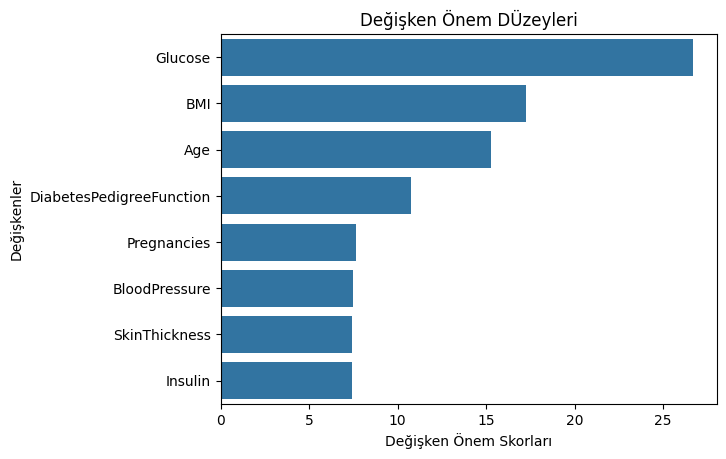

256:	learn: 0.0193561	total: 5s	remaining: 836ms
257:	learn: 0.0191735	total: 5s	remaining: 814ms
258:	learn: 0.0189942	total: 5s	remaining: 792ms
259:	learn: 0.0188860	total: 5s	remaining: 770ms
260:	learn: 0.0187738	total: 5.01s	remaining: 748ms
261:	learn: 0.0186679	total: 5.01s	remaining: 727ms
262:	learn: 0.0185462	total: 5.01s	remaining: 706ms
263:	learn: 0.0184275	total: 5.02s	remaining: 684ms
264:	learn: 0.0183255	total: 5.03s	remaining: 664ms
265:	learn: 0.0181959	total: 5.03s	remaining: 643ms
266:	learn: 0.0181470	total: 5.04s	remaining: 622ms
267:	learn: 0.0180341	total: 5.04s	remaining: 602ms
268:	learn: 0.0179120	total: 5.06s	remaining: 583ms
269:	learn: 0.0177026	total: 5.07s	remaining: 564ms
270:	learn: 0.0176316	total: 5.13s	remaining: 549ms
271:	learn: 0.0175261	total: 5.15s	remaining: 530ms
272:	learn: 0.0175170	total: 5.2s	remaining: 514ms
273:	learn: 0.0174792	total: 5.22s	remaining: 495ms
274:	learn: 0.0173693	total: 5.25s	remaining: 477ms
275:	learn: 0.0173289	tot

98:	learn: 0.4089916	total: 1.49s	remaining: 15.1ms
99:	learn: 0.4080146	total: 1.5s	remaining: 0us
[CV] END ........depth=8, iterations=100, learning_rate=0.03; total time=   1.6s
46:	learn: 0.4920046	total: 649ms	remaining: 732ms
47:	learn: 0.4897234	total: 663ms	remaining: 718ms
48:	learn: 0.4877135	total: 688ms	remaining: 717ms
49:	learn: 0.4854541	total: 710ms	remaining: 710ms
50:	learn: 0.4833298	total: 715ms	remaining: 687ms
51:	learn: 0.4811220	total: 750ms	remaining: 692ms
52:	learn: 0.4788048	total: 787ms	remaining: 698ms
53:	learn: 0.4763399	total: 806ms	remaining: 687ms
54:	learn: 0.4741696	total: 854ms	remaining: 698ms
55:	learn: 0.4724818	total: 863ms	remaining: 678ms
56:	learn: 0.4704041	total: 873ms	remaining: 658ms
57:	learn: 0.4683419	total: 899ms	remaining: 651ms
58:	learn: 0.4664619	total: 910ms	remaining: 633ms
59:	learn: 0.4645328	total: 924ms	remaining: 616ms
60:	learn: 0.4627692	total: 940ms	remaining: 601ms
61:	learn: 0.4607552	total: 962ms	remaining: 590ms
62:

99:	learn: 0.4022463	total: 1.42s	remaining: 0us
[CV] END ........depth=8, iterations=100, learning_rate=0.03; total time=   1.5s
0:	learn: 0.6663322	total: 2.22ms	remaining: 219ms
1:	learn: 0.6475931	total: 4.71ms	remaining: 231ms
2:	learn: 0.6251182	total: 10.6ms	remaining: 342ms
3:	learn: 0.6073631	total: 13.5ms	remaining: 324ms
4:	learn: 0.5914053	total: 22ms	remaining: 418ms
5:	learn: 0.5777706	total: 26.1ms	remaining: 409ms
6:	learn: 0.5641054	total: 35.4ms	remaining: 470ms
7:	learn: 0.5526126	total: 62.6ms	remaining: 720ms
8:	learn: 0.5392675	total: 68.5ms	remaining: 692ms
9:	learn: 0.5283886	total: 70.3ms	remaining: 632ms
10:	learn: 0.5159863	total: 125ms	remaining: 1.01s
11:	learn: 0.5084290	total: 143ms	remaining: 1.05s
12:	learn: 0.4994019	total: 146ms	remaining: 979ms
13:	learn: 0.4917980	total: 183ms	remaining: 1.13s
14:	learn: 0.4845853	total: 188ms	remaining: 1.07s
15:	learn: 0.4773685	total: 194ms	remaining: 1.02s
16:	learn: 0.4703382	total: 199ms	remaining: 970ms
17:	l

[CV] END ........depth=8, iterations=100, learning_rate=0.03; total time=   1.4s
0:	learn: 0.6640243	total: 14.6ms	remaining: 1.44s
1:	learn: 0.6413069	total: 28.7ms	remaining: 1.41s
2:	learn: 0.6192419	total: 40.1ms	remaining: 1.3s
3:	learn: 0.6040932	total: 46.6ms	remaining: 1.12s
4:	learn: 0.5886743	total: 51.2ms	remaining: 973ms
5:	learn: 0.5751139	total: 56.8ms	remaining: 889ms
6:	learn: 0.5590050	total: 111ms	remaining: 1.47s
7:	learn: 0.5462411	total: 126ms	remaining: 1.45s
8:	learn: 0.5341447	total: 132ms	remaining: 1.33s
9:	learn: 0.5266273	total: 186ms	remaining: 1.67s
10:	learn: 0.5177065	total: 189ms	remaining: 1.53s
11:	learn: 0.5075804	total: 192ms	remaining: 1.41s
12:	learn: 0.4977139	total: 249ms	remaining: 1.67s
13:	learn: 0.4884363	total: 306ms	remaining: 1.88s
14:	learn: 0.4817216	total: 328ms	remaining: 1.86s
15:	learn: 0.4739351	total: 347ms	remaining: 1.82s
16:	learn: 0.4659275	total: 353ms	remaining: 1.72s
17:	learn: 0.4587107	total: 385ms	remaining: 1.75s
18:	le

In [14]:
# degisken onem duzeyleri

feature_imp = pd.Series(catb_tuned.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem DÜzeyleri")
plt.show()